In [1]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Stats
from scipy.stats import zscore

# Display settings
pd.set_option("display.max_columns", None)
plt.style.use("default")


In [ ]:
import pandas as pd

files = [
    r"D:\UIDAI\DATA\api_data_aadhar_biometric\api_data_aadhar_biometric_0_500000.csv",
    r"D:\UIDAI\DATA\api_data_aadhar_biometric\api_data_aadhar_biometric_500000_1000000.csv",
    r"D:\UIDAI\DATA\api_data_aadhar_biometric\api_data_aadhar_biometric_1000000_1500000.csv",
    r"D:\UIDAI\DATA\api_data_aadhar_biometric\api_data_aadhar_biometric_1500000_1861108.csv"
    ""
]

df = pd.concat((pd.read_csv(f) for f in files), ignore_index=True)

df.to_csv("merged.csv", index=False)

import pandas as pd

files2 = [
    r"D:\UIDAI\DATA\api_data_aadhar_demographic\api_data_aadhar_demographic_0_500000.csv",
    r"D:\UIDAI\DATA\api_data_aadhar_demographic\api_data_aadhar_demographic_500000_1000000.csv",
    r"D:\UIDAI\DATA\api_data_aadhar_demographic\api_data_aadhar_demographic_1000000_1500000.csv",
    r"D:\UIDAI\DATA\api_data_aadhar_demographic\api_data_aadhar_demographic_1500000_2000000.csv",
    r"D:\UIDAI\DATA\api_data_aadhar_demographic\api_data_aadhar_demographic_2000000_2071700.csv"
]

df = pd.concat((pd.read_csv(f) for f in files2), ignore_index=True)

df.to_csv("demographic.csv", index=False)


files3 = [
    r"D:\UIDAI\DATA\api_data_aadhar_enrolment\api_data_aadhar_enrolment_0_500000.csv",
    r"D:\UIDAI\DATA\api_data_aadhar_enrolment\api_data_aadhar_enrolment_500000_1000000.csv",
    r"D:\UIDAI\DATA\api_data_aadhar_enrolment\api_data_aadhar_enrolment_1000000_1006029.csv",

]

df = pd.concat((pd.read_csv(f) for f in files3), ignore_index=True)

df.to_csv("Enrolment.csv", index=False)

In [2]:
import pandas as pd

enrol = pd.read_csv(r"D:\UIDAI\DATA\Enrolment.csv")
demo = pd.read_csv(r"D:\UIDAI\DATA\demographic.csv")
bio = pd.read_csv(r"D:\UIDAI\DATA\biometric.csv")

for df, name in zip([enrol, demo, bio], ["Enrolment", "Demographic", "Biometric"]):
    print(name)
    print(df.shape)
    print(df.isna().sum().head())

Enrolment
(1006029, 7)
date        0
state       0
district    0
pincode     0
age_0_5     0
dtype: int64
Demographic
(2071700, 6)
date             0
state            0
district         0
pincode          0
demo_age_5_17    0
dtype: int64
Biometric
(1861108, 6)
date            0
state           0
district        0
pincode         0
bio_age_5_17    0
dtype: int64


In [3]:
def clean_columns(df):
    df.columns = (
        df.columns.str.strip()
                  .str.lower()
                  .str.replace(" ", "_")
    )
    return df

enrol = clean_columns(enrol)
demo  = clean_columns(demo)
bio   = clean_columns(bio)


In [4]:
# Adjust column name if needed (e.g. 'date' or 'enrolment_date')
enrol["year"] = pd.to_datetime(enrol["date"], errors="coerce").dt.year
demo["year"]  = pd.to_datetime(demo["date"], errors="coerce").dt.year
bio["year"]   = pd.to_datetime(bio["date"], errors="coerce").dt.year


In [5]:
enrol["date"] = pd.to_datetime(enrol["date"],errors="coerce")
enrol_2025 = enrol[enrol["date"].dt.year == 2025]

enrol_2025["month"] = enrol_2025["date"].dt.month


C:\Users\ansik\AppData\Local\Temp\ipykernel_2448\367481117.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enrol_2025["month"] = enrol_2025["date"].dt.month


In [6]:
monthly_agewise = enrol_2025.groupby("month")[[
    "age_0_5",
    "age_5_17",
    "age_18_greater"
]].sum().reset_index()

monthly_agewise["month_name"] = monthly_agewise["month"].apply(
    lambda x: pd.to_datetime(str(x), format="%m").strftime("%b")
)




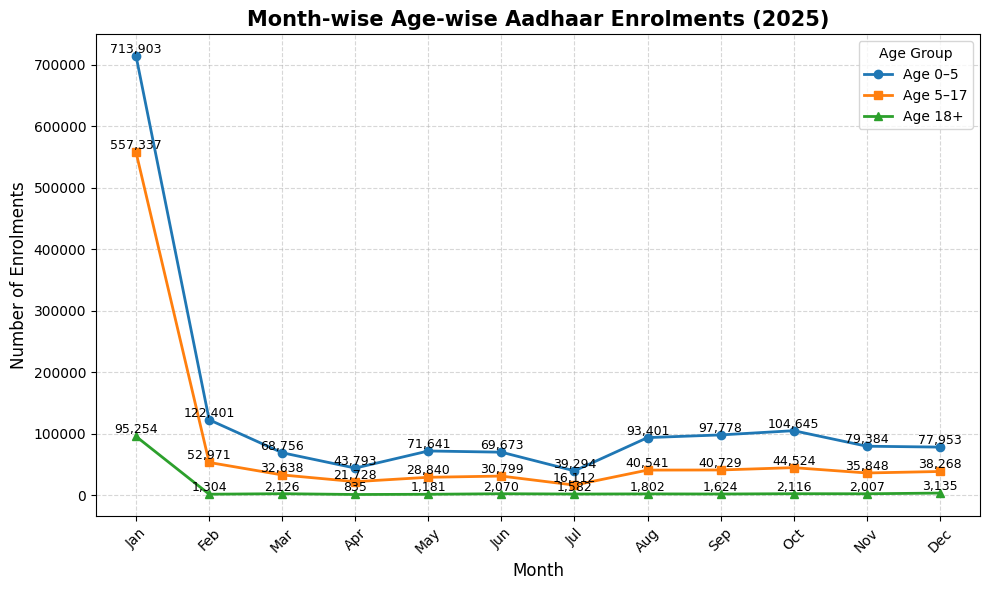

In [7]:
plt.figure(figsize=(10,6))
plt.grid(True, linestyle="--", alpha=0.5)

# Plot lines
plt.plot(monthly_agewise["month_name"], monthly_agewise["age_0_5"],
         marker="o", linewidth=2, label="Age 0–5")
plt.plot(monthly_agewise["month_name"], monthly_agewise["age_5_17"],
         marker="s", linewidth=2, label="Age 5–17")
plt.plot(monthly_agewise["month_name"], monthly_agewise["age_18_greater"],
         marker="^", linewidth=2, label="Age 18+")

# Add value labels
for i, month in enumerate(monthly_agewise["month_name"]):
    plt.text(i, monthly_agewise["age_0_5"].iloc[i],
             f'{monthly_agewise["age_0_5"].iloc[i]:,}',
             ha='center', va='bottom', fontsize=9)

    plt.text(i, monthly_agewise["age_5_17"].iloc[i],
             f'{monthly_agewise["age_5_17"].iloc[i]:,}',
             ha='center', va='bottom', fontsize=9)

    plt.text(i, monthly_agewise["age_18_greater"].iloc[i],
             f'{monthly_agewise["age_18_greater"].iloc[i]:,}',
             ha='center', va='bottom', fontsize=9)

plt.title("Month-wise Age-wise Aadhaar Enrolments (2025)", fontsize=15, fontweight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Enrolments", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Age Group")
plt.tight_layout()
plt.show()


In [8]:
# State wise aadhar enrolment graph :
enrol["date"] = pd.to_datetime(enrol["date"])
enrol_2025 = enrol[enrol["date"].dt.year == 2025]
enrol_2025["total_enrolments"] = (
    enrol_2025["age_0_5"] +
    enrol_2025["age_5_17"] +
    enrol_2025["age_18_greater"]
)
state_wise = enrol_2025.groupby("state")["total_enrolments"].sum().reset_index()

state_wise = state_wise.sort_values(
    by="total_enrolments", ascending=False
).head(10)




C:\Users\ansik\AppData\Local\Temp\ipykernel_2448\4231407015.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enrol_2025["total_enrolments"] = (


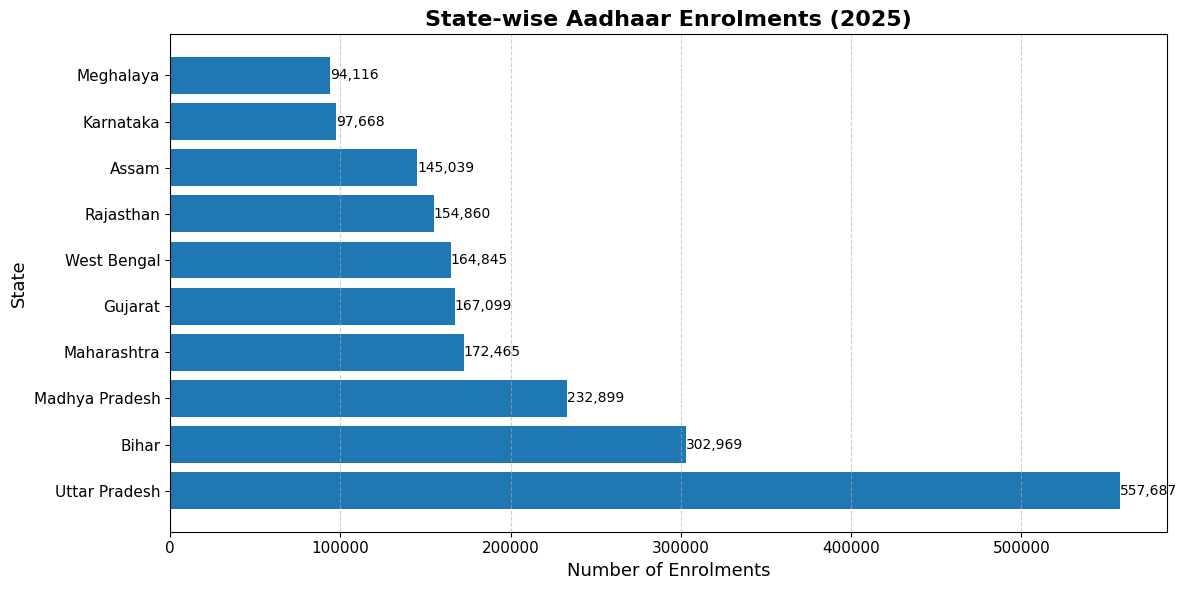

In [12]:
import matplotlib.pyplot as plt

# Sort ascending so largest appears at top after inversion
state_wise_sorted = state_wise.sort_values(by="total_enrolments")

plt.figure(figsize=(12,6))

bars = plt.barh(
    state_wise_sorted["state"],
    state_wise_sorted["total_enrolments"]
)

# Value labels
for bar in bars:
    width = bar.get_width()
    plt.text(
        width,
        bar.get_y() + bar.get_height() / 2,
        f"{int(width):,}",
        va="center",
        ha="left",
        fontsize=10
    )

plt.title(
    "State-wise Aadhaar Enrolments (2025)",
    fontsize=16,
    fontweight="bold"
)
plt.xlabel("Number of Enrolments", fontsize=13)
plt.ylabel("State", fontsize=13)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.grid(axis="x", linestyle="--", alpha=0.6)

# 🔑 This line ensures highest is on TOP
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


In [13]:
# Top 10 state age wise enrolment
state_agewise = enrol_2025.groupby("state")[[
    "age_0_5",
    "age_5_17",
    "age_18_greater"
]].sum().reset_index()


top10_0_5 = state_agewise.sort_values(
    by="age_0_5", ascending=False
).head(10)

top10_5_17 = state_agewise.sort_values(
    by="age_5_17", ascending=False
).head(10)

top10_18 = state_agewise.sort_values(
    by="age_18_greater", ascending=False
).head(10)



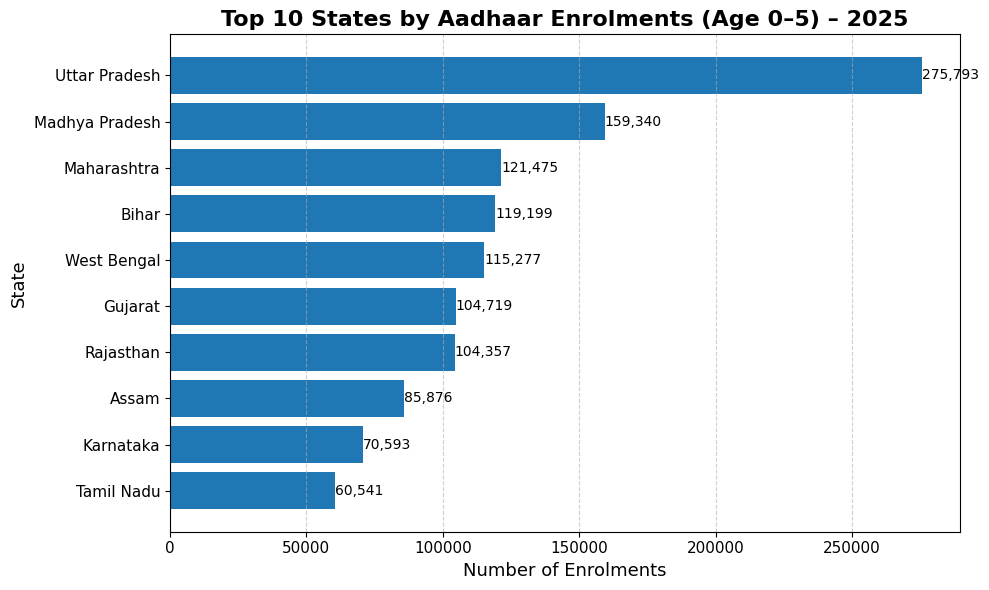

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

bars = plt.barh(
    top10_0_5["state"],
    top10_0_5["age_0_5"]
)

# Add value labels at the end of bars
for bar in bars:
    width = bar.get_width()
    plt.text(
        width,
        bar.get_y() + bar.get_height()/2,
        f"{int(width):,}",
        va="center",
        fontsize=10
    )

# Titles and labels
plt.title(
    "Top 10 States by Aadhaar Enrolments (Age 0–5) – 2025",
    fontsize=16,
    fontweight="bold"
)
plt.xlabel("Number of Enrolments", fontsize=13)
plt.ylabel("State", fontsize=13)

# Improve readability
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis="x", linestyle="--", alpha=0.6)

# Highest value on top (ranking effect)
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()




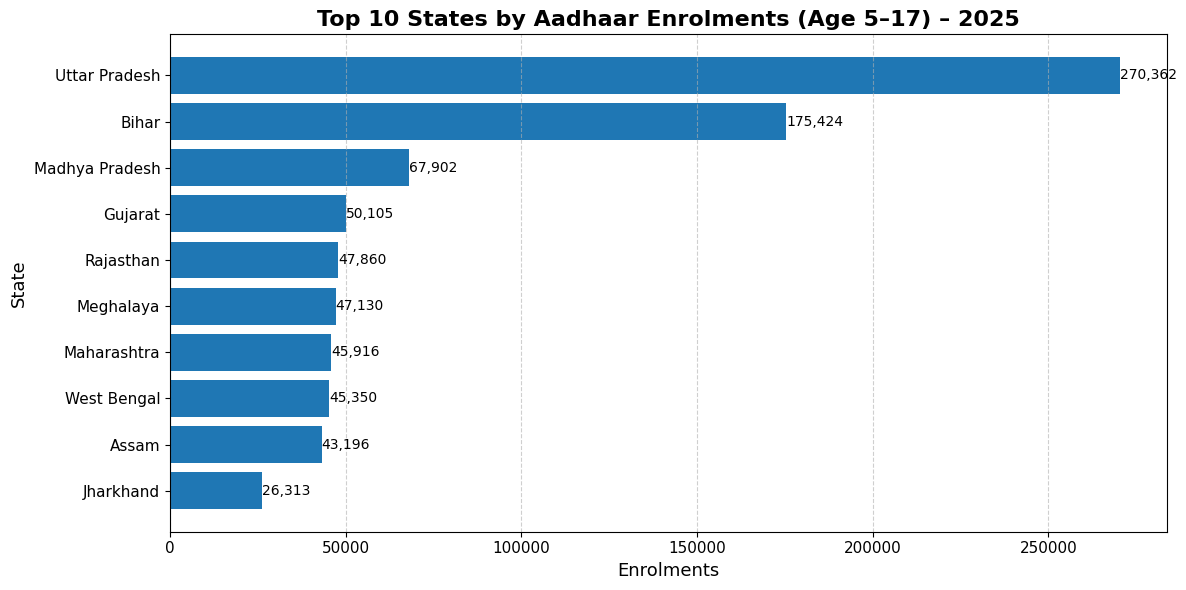

In [15]:
plt.figure(figsize=(12,6))

bars = plt.barh(
    top10_5_17["state"],
    top10_5_17["age_5_17"]
)

# Correct value labels for horizontal bars
for bar in bars:
    width = bar.get_width()
    plt.text(
        width,
        bar.get_y() + bar.get_height() / 2,
        f"{int(width):,}",
        va="center",
        ha="left",
        fontsize=10
    )

plt.title(
    "Top 10 States by Aadhaar Enrolments (Age 5–17) – 2025",
    fontsize=16,
    fontweight="bold"
)

# Correct axis labels for horizontal chart
plt.xlabel("Enrolments", fontsize=13)
plt.ylabel("State", fontsize=13)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis="x", linestyle="--", alpha=0.6)
# Highest value on top (ranking effect)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


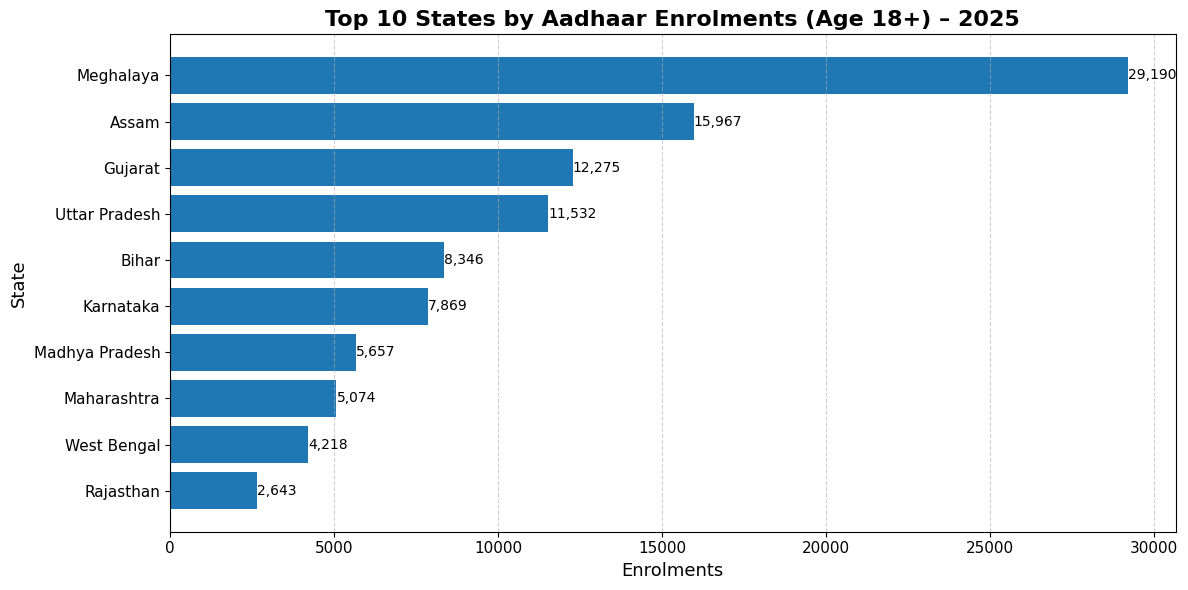

In [16]:
plt.figure(figsize=(12,6))

bars = plt.barh(top10_18["state"], top10_18["age_18_greater"])

for bar in bars:
    width = bar.get_width()
    plt.text(
        width,
        bar.get_y() + bar.get_height() / 2,
        f"{int(width):,}",
        va="center",
        ha="left",
        fontsize=10
    )

plt.title(
    "Top 10 States by Aadhaar Enrolments (Age 18+) – 2025",
    fontsize=16,
    fontweight="bold"
)
plt.xlabel("Enrolments", fontsize=13)
plt.ylabel("State", fontsize=13)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis="x", linestyle="--", alpha=0.6)
# Highest value on top (ranking effect)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [27]:

age_groups = ["age_0_5", "age_5_17", "age_18_greater"]
top_states_dict = {
    "age_0_5": top10_0_5,
    "age_5_17": top10_5_17,
    "age_18_greater": top10_18
}


=== Pie charts for age_0_5 ===


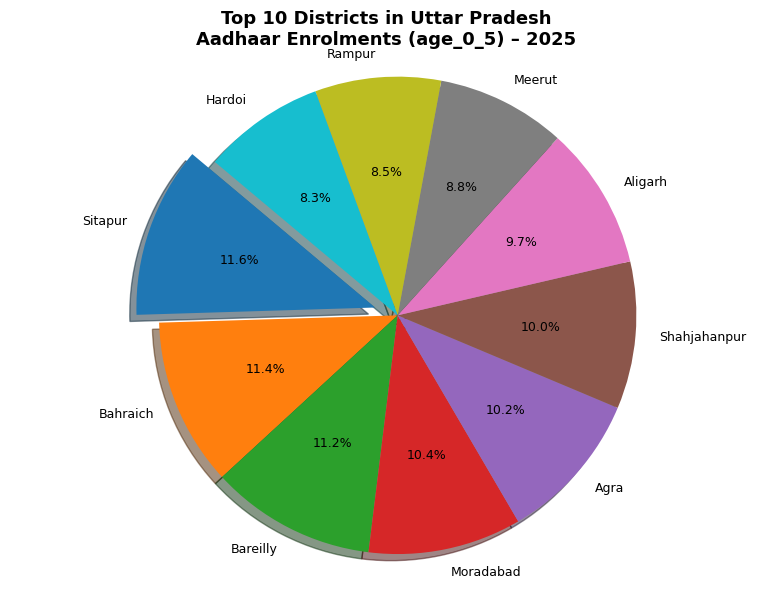

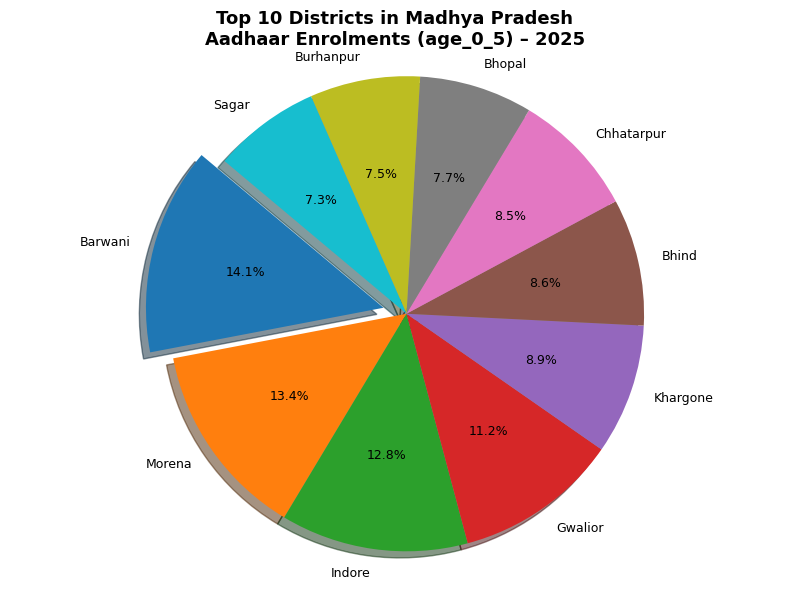

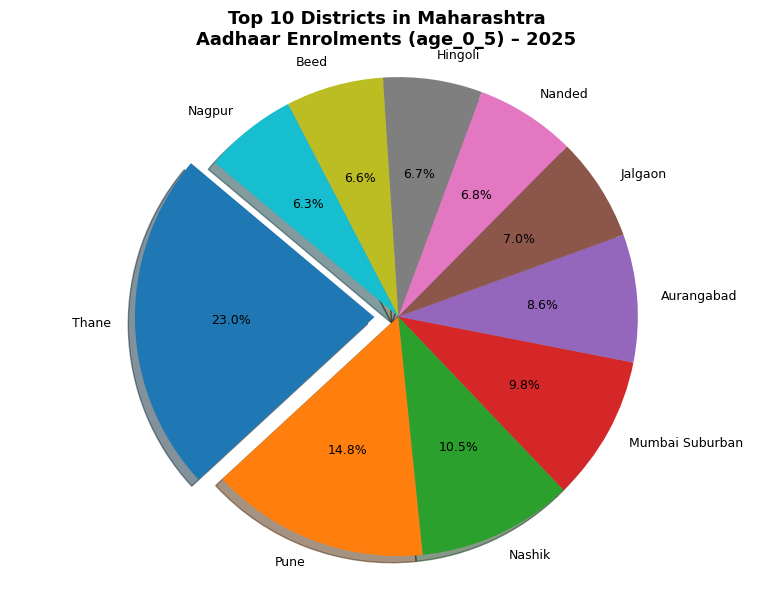

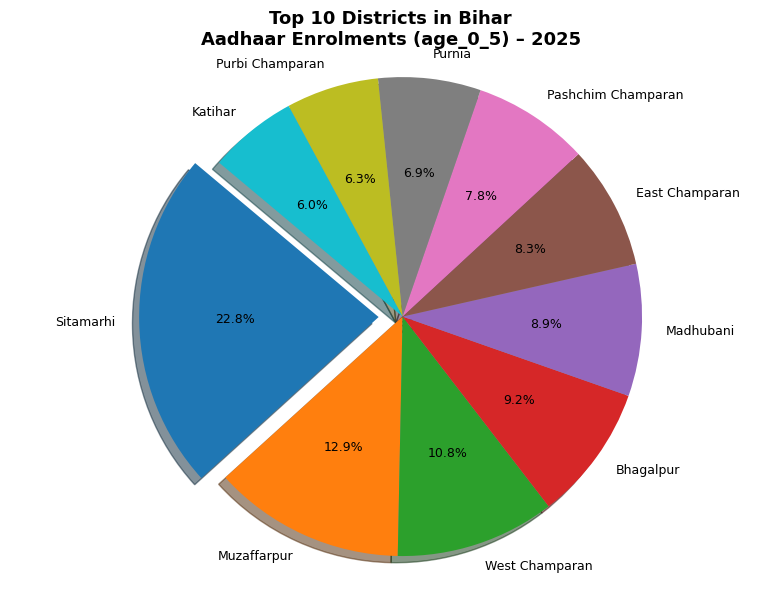

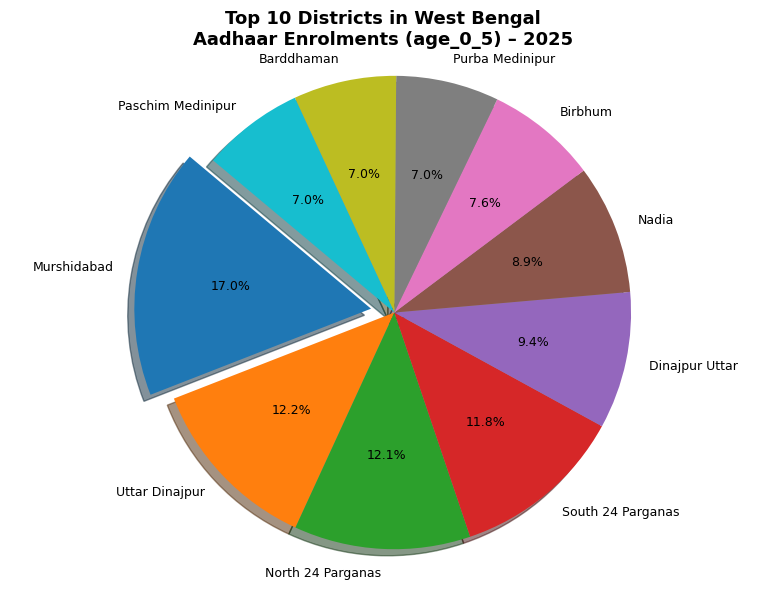

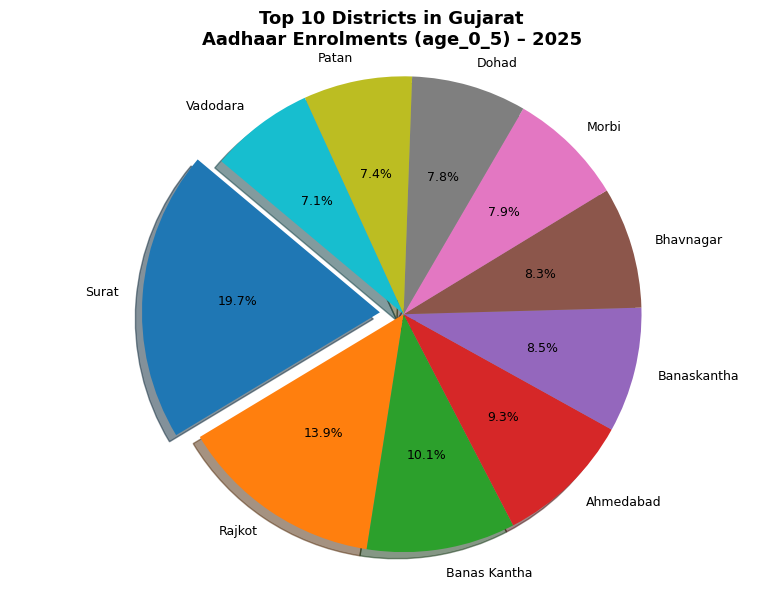

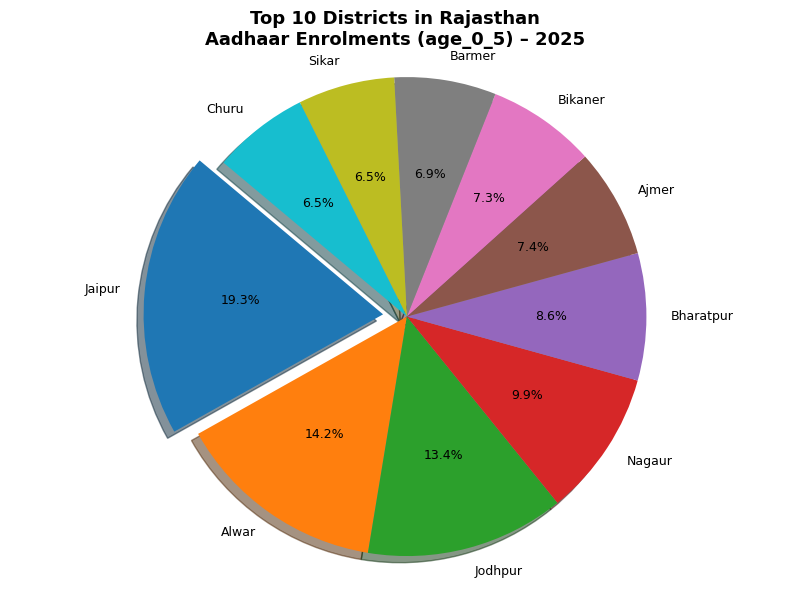

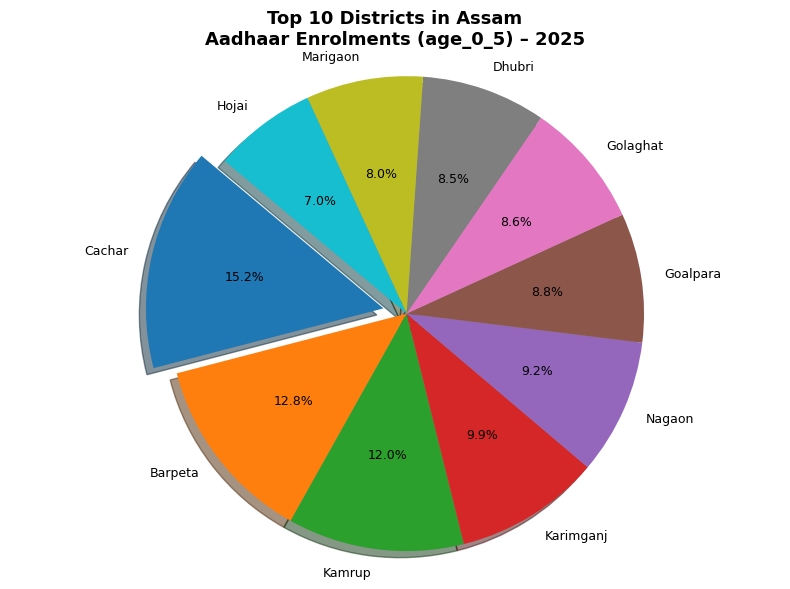

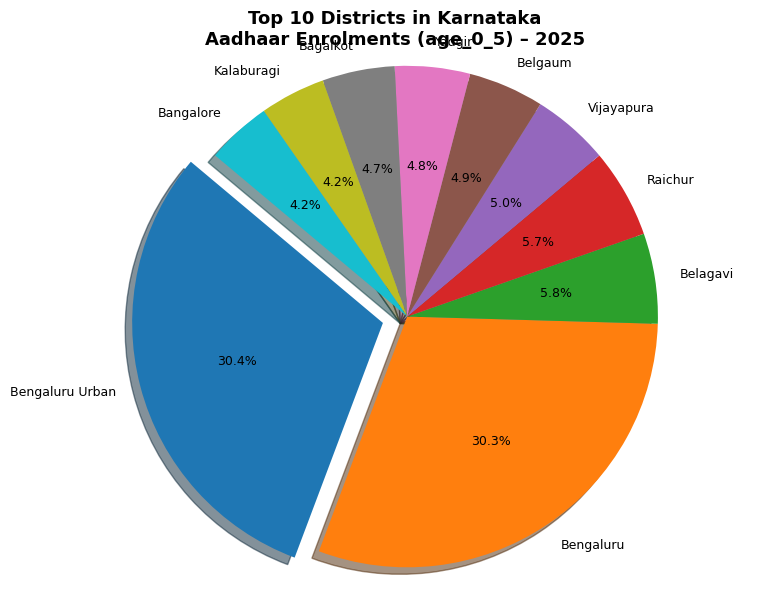

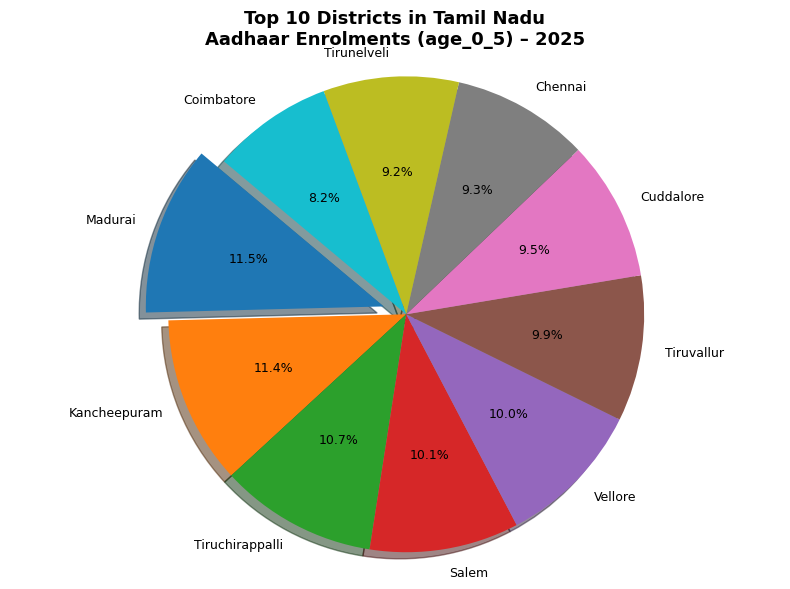


=== Pie charts for age_5_17 ===


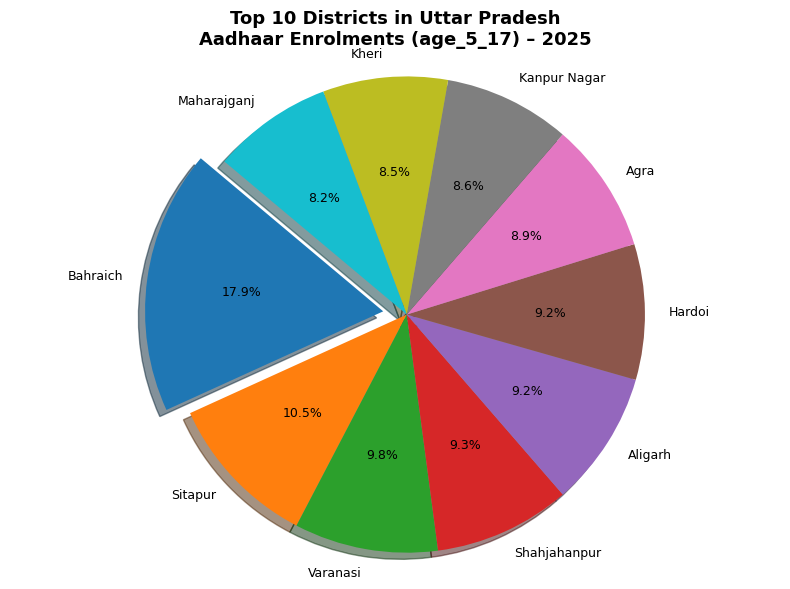

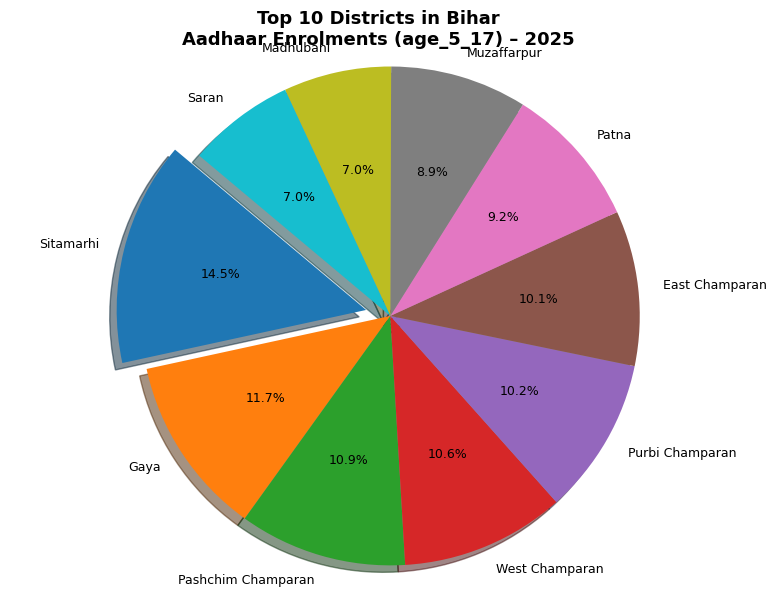

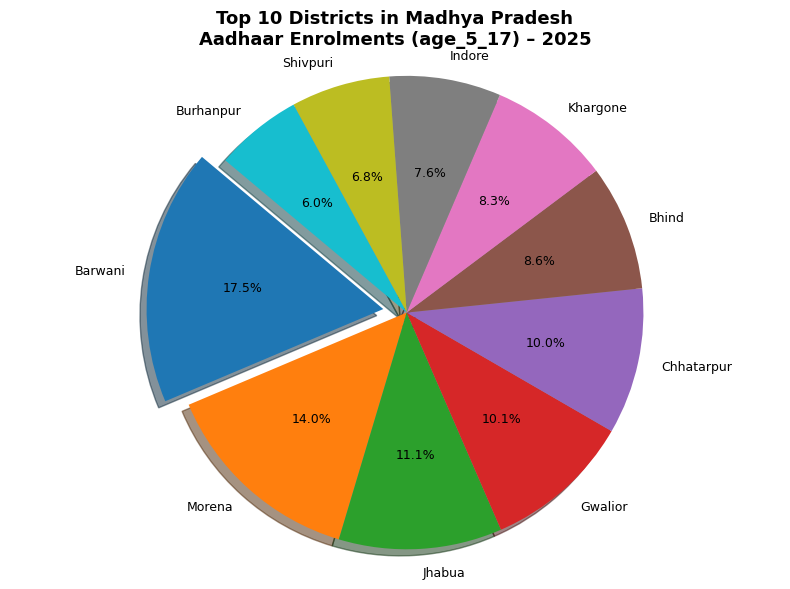

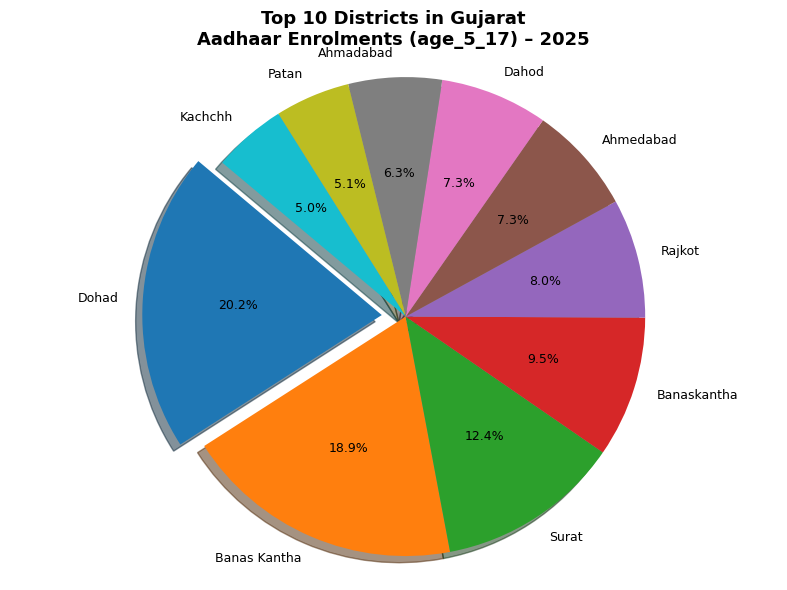

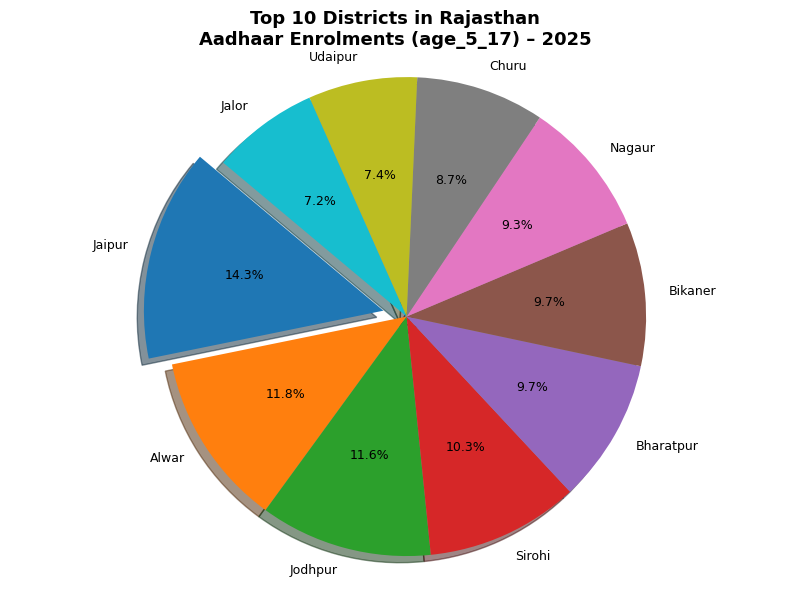

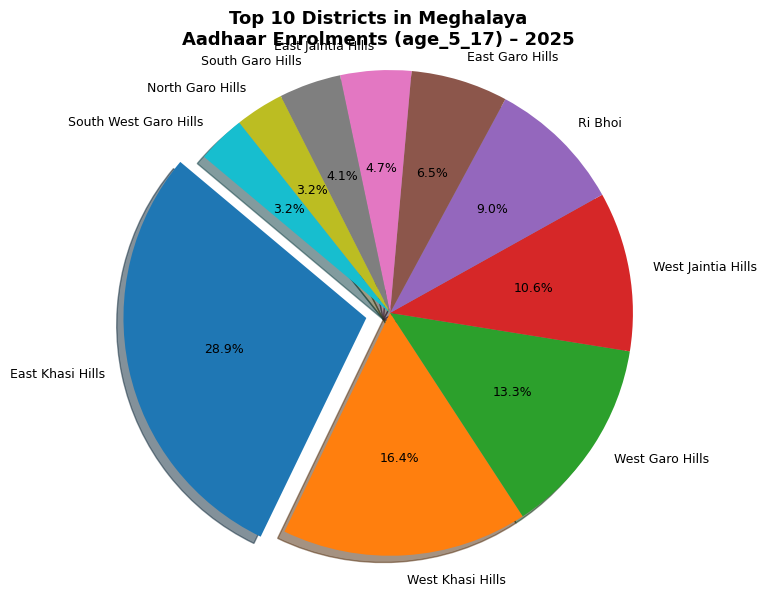

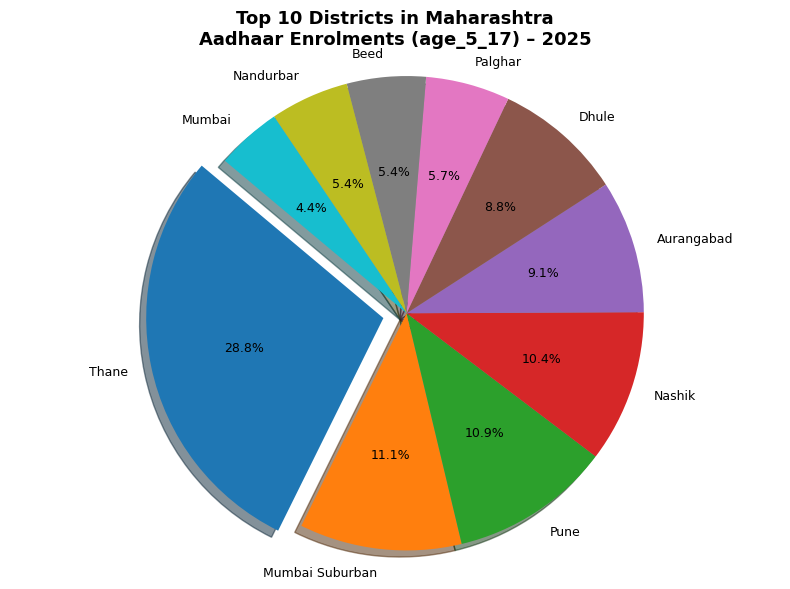

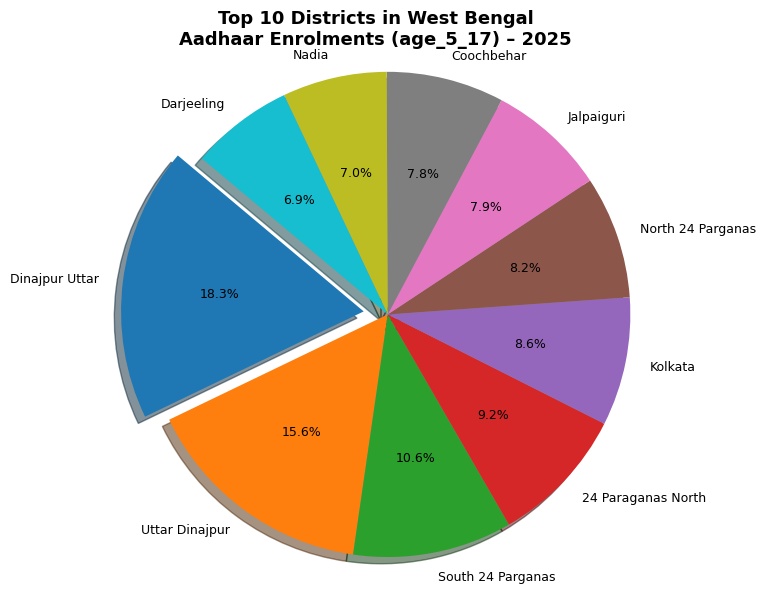

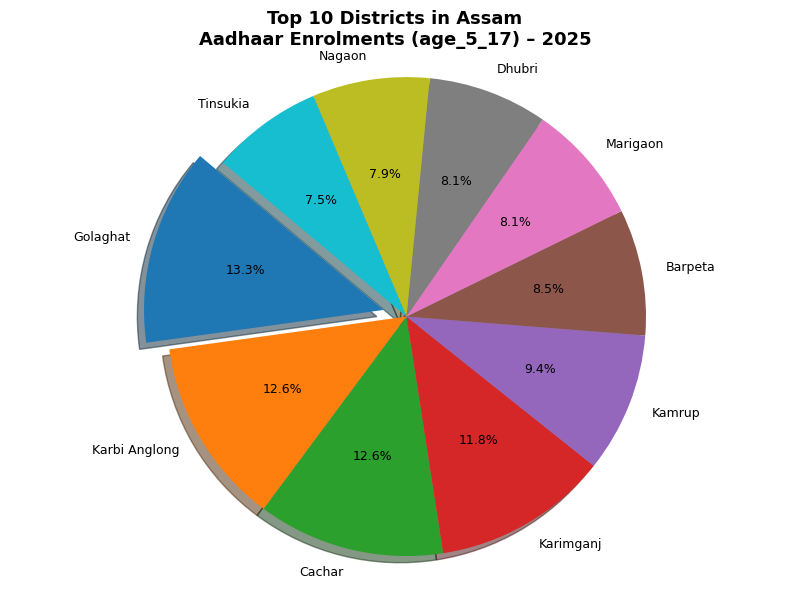

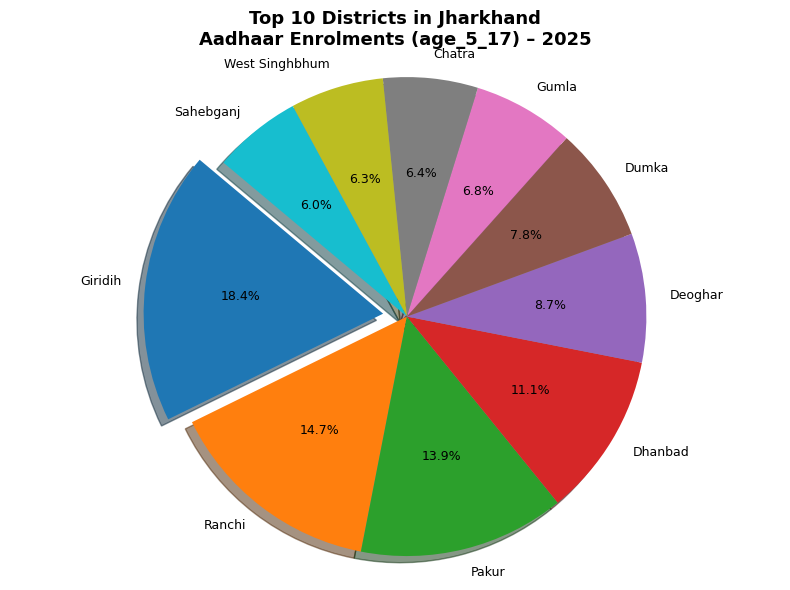


=== Pie charts for age_18_greater ===


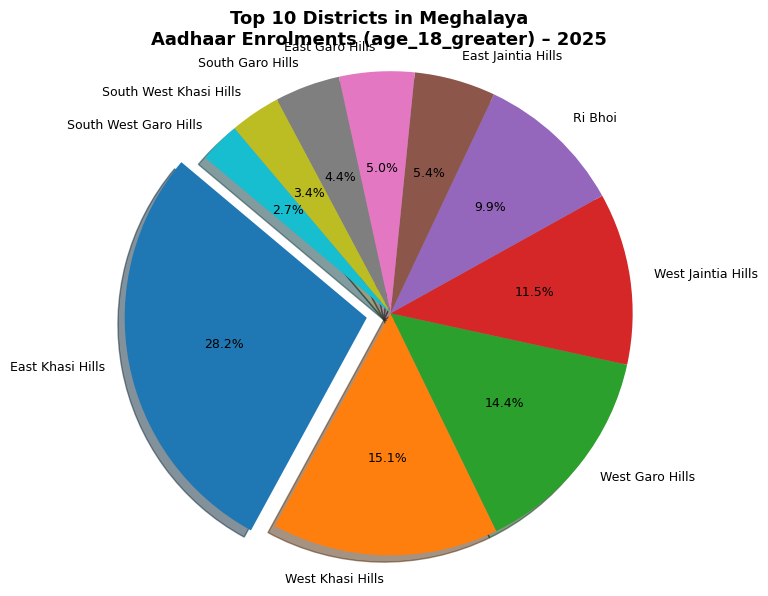

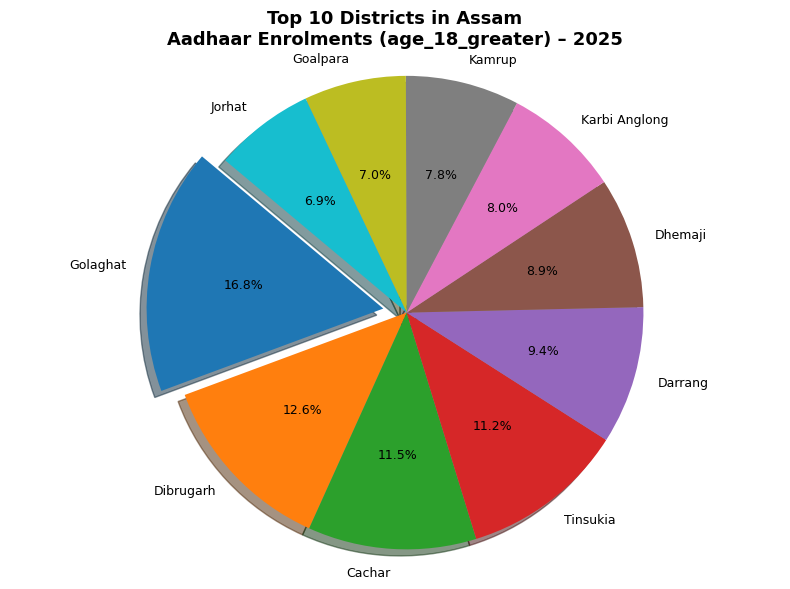

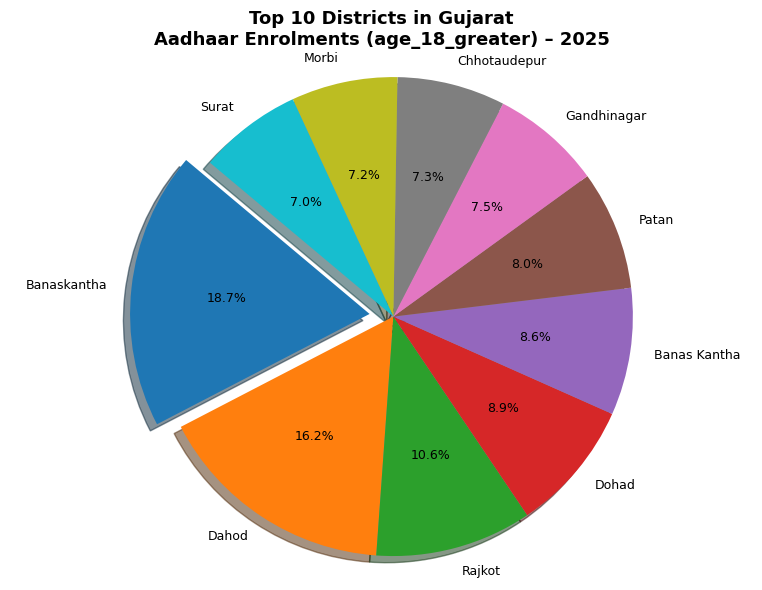

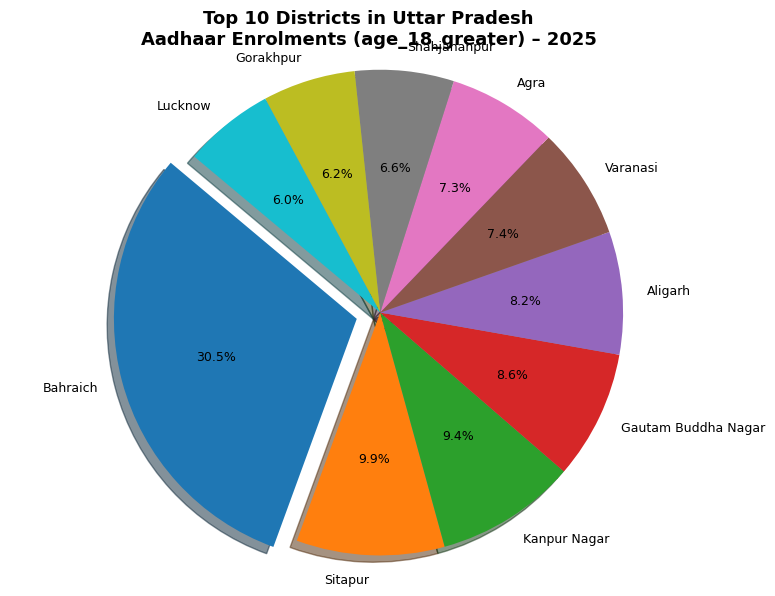

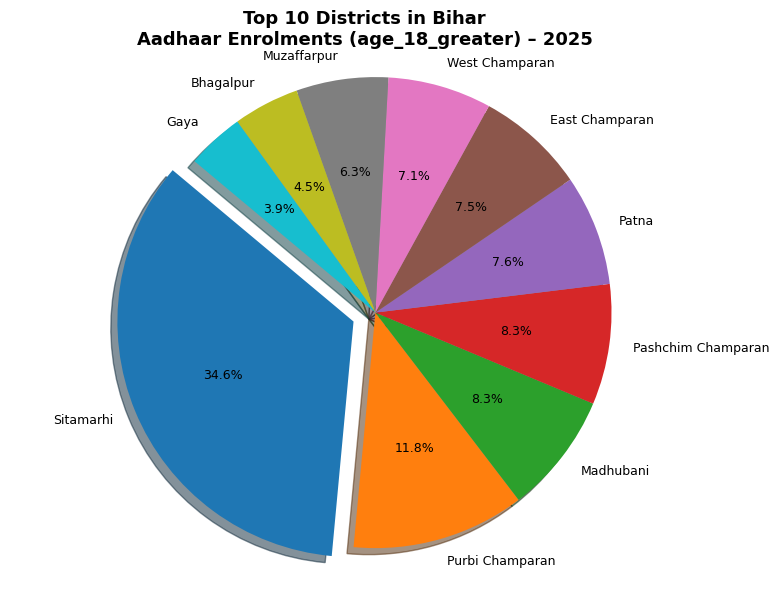

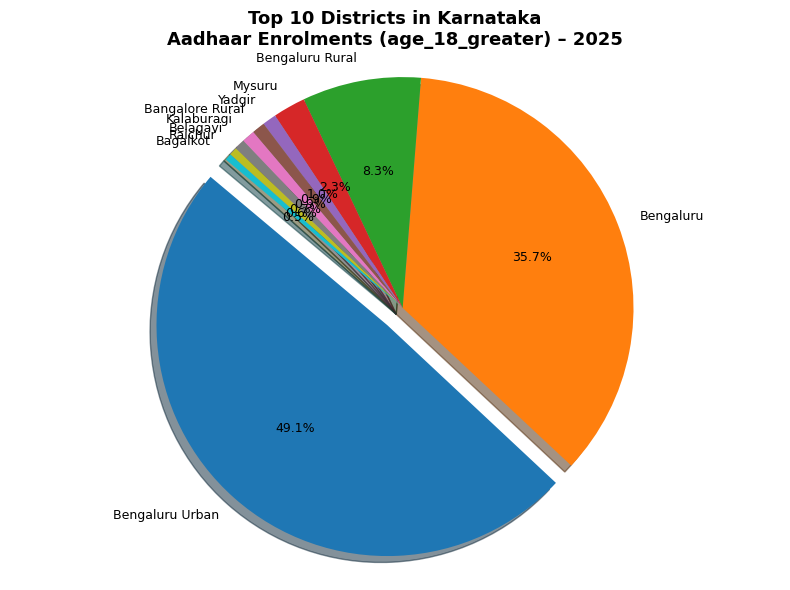

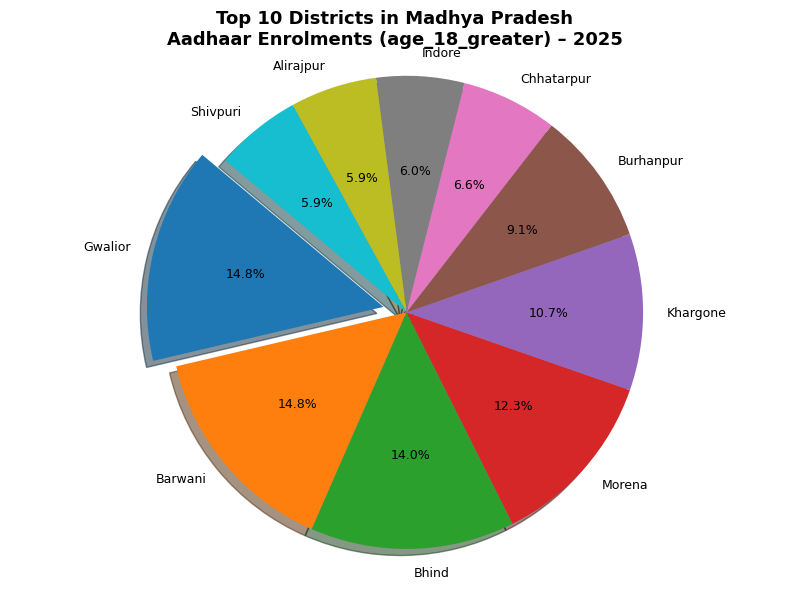

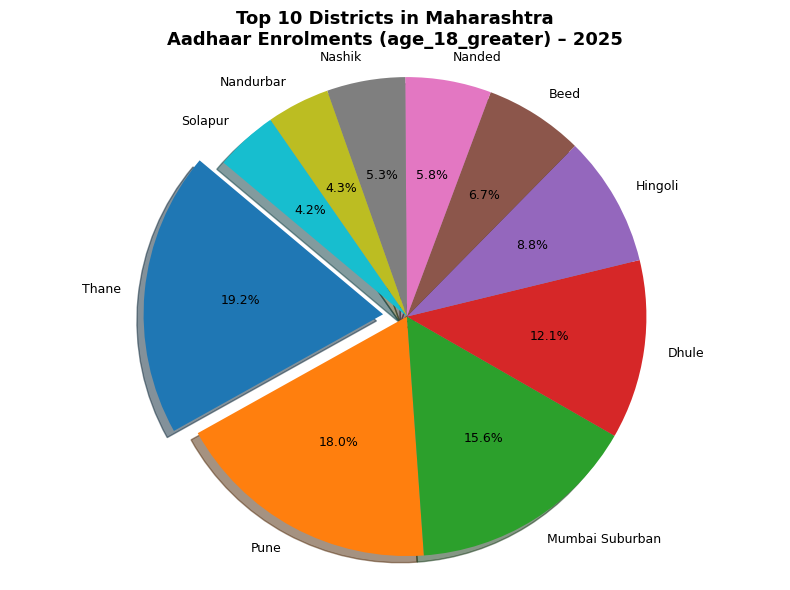

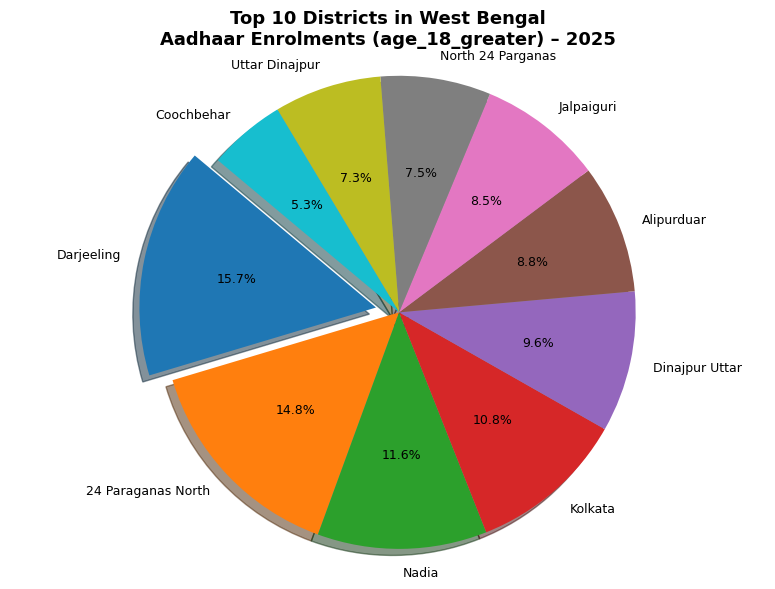

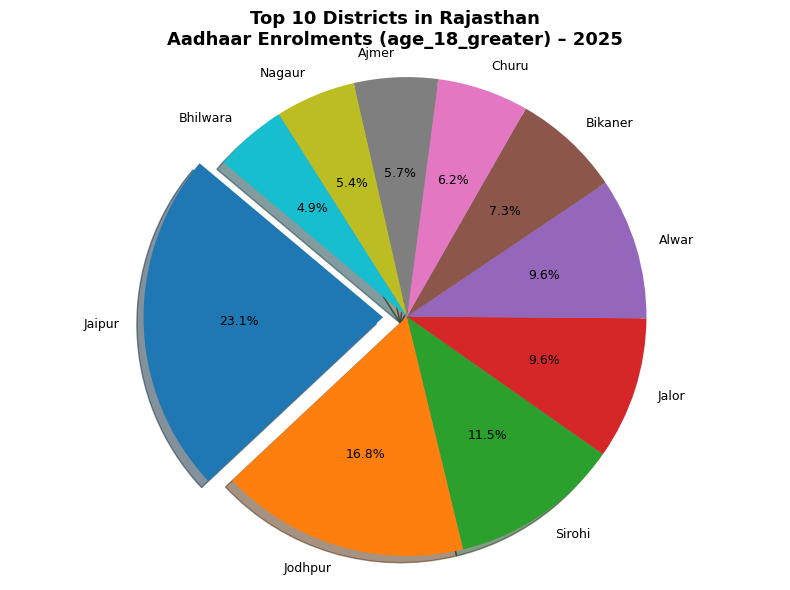

In [28]:
import matplotlib.pyplot as plt

age_groups = ["age_0_5", "age_5_17", "age_18_greater"]
top_states_dict = {
    "age_0_5": top10_0_5,
    "age_5_17": top10_5_17,
    "age_18_greater": top10_18
}

for age in age_groups:
    print(f"\n=== Pie charts for {age} ===")
    
    for state in top_states_dict[age]["state"]:
        state_df = enrol_2025[enrol_2025["state"] == state]
        
        district_sum = state_df.groupby("district")[age].sum().reset_index()
        top10_districts = district_sum.sort_values(by=age, ascending=False).head(10)

        plt.figure(figsize=(8,6))

        # explode only the largest district
        explode = [0.1] + [0]*(len(top10_districts)-1)

        plt.pie(
            top10_districts[age],
            labels=top10_districts["district"],
            autopct="%1.1f%%",
            startangle=140,
            explode=explode,
            shadow=True,
            textprops={"fontsize": 9}
        )

        plt.title(
            f"Top 10 Districts in {state}\nAadhaar Enrolments ({age}) – 2025",
            fontsize=13,
            fontweight="bold"
        )

        plt.axis("equal")
        plt.tight_layout()
        plt.show()


In [ ]:
# Demographics 

demo["date"] = pd.to_datetime(demo["date"],errors="coerce")
demo_2025 = demo[demo["date"].dt.year == 2025]

demo_2025["month"] = demo_2025["date"].dt.month



In [ ]:
monthly_agewise = demo_2025.groupby("month")[[
    "demo_age_5_17",
    "demo_age_17_",
    
]].sum().reset_index()

monthly_agewise["month_name"] = monthly_agewise["month"].apply(
    lambda x: pd.to_datetime(str(x), format="%m").strftime("%b")
)

import matplotlib.pyplot as plt

         # basic seaborn style (if installed)
plt.style.use("ggplot")          # classic ggplot style
plt.style.use("fivethirtyeight") # modern clean style
plt.style.use("seaborn-v0_8-whitegrid") # for latest versions

plt.figure(figsize=(12,6))

# Lines
plt.plot(monthly_agewise["month_name"], monthly_agewise["demo_age_5_17"],
         marker="o", linestyle="-", color="#1f77b4", label="Age 0–5")
plt.plot(monthly_agewise["month_name"], monthly_agewise["demo_age_17_"],
         marker="s", linestyle="--", color="#ff7f0e", label="Age 5–17")


# Data labels
for i, val in enumerate(monthly_agewise["demo_age_5_17"]):
    plt.text(i, val + 50, f"{val:,}", ha="center", fontsize=8)

for i, val in enumerate(monthly_agewise["demo_age_17_"]):
    plt.text(i, val + 50, f"{val:,}", ha="center", fontsize=8)

# Title, labels, legend
plt.title("Month-wise Age-wise Demographics Updates (2025)", fontsize=16, fontweight="bold")
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Updates", fontsize=14)
plt.legend(fontsize=12)

# Style
plt.xticks(rotation=45, ha="right", fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


In [ ]:
# Statewise demographics Updates :
demo["date"] = pd.to_datetime(demo["date"])
demo_2025 = demo[demo["date"].dt.year == 2025]
demo_2025["total_demographics_update"] = (
    demo_2025["demo_age_5_17"] +
    demo_2025["demo_age_17_"] 
    )


state_wise = demo_2025.groupby("state")["total_demographics_update"].sum().reset_index()

state_wise = state_wise.sort_values(
    by="total_demographics_update", ascending=False
).head(10)





In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))  # wide figure for readability

# Horizontal bars
bars = plt.barh(
    state_wise["state"],
    state_wise["total_demographics_update"],
    color="#4C72B0",
    edgecolor="black"
)

# Invert y-axis so the highest value appears on top
plt.gca().invert_yaxis()

# Add value labels at the end of bars
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + max(state_wise["total_demographics_update"])*0.01,  # small offset
        bar.get_y() + bar.get_height()/2,
        f"{int(width):,}",  # comma separated
        va="center",
        fontsize=10
    )

# Titles and labels
plt.title("State-wise Aadhaar Demographics Updates (2025)", fontsize=16, fontweight="bold")
plt.xlabel("Number of Demographics Updates", fontsize=12)
plt.ylabel("State", fontsize=12)

# Grid for x-axis
plt.grid(axis="x", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


In [ ]:
age_groups = ["demo_age_5_17", "demo_age_17_",]
top_states_dict = {
    "demo_age_5_17": top10_0_5,
    "demo_age_17_": top10_5_17
    
}

In [ ]:


for age in age_groups:
    print(f"\n=== Pie charts for {age} ===")
    
    for state in top_states_dict[age]["state"]:
        state_df = demo_2025[demo_2025["state"] == state]
        
        district_sum = state_df.groupby("district")[age].sum().reset_index()
        top10_districts = district_sum.sort_values(by=age, ascending=False).head(10)

        plt.figure(figsize=(8,6))

        # explode only the largest district
        explode = [0.1] + [0]*(len(top10_districts)-1)

        plt.pie(
            top10_districts[age],
            labels=top10_districts["district"],
            autopct="%1.1f%%",
            startangle=140,
            explode=explode,
            shadow=True,
            textprops={"fontsize": 9}
        )

        plt.title(
            f"Top 10 Districts in {state}\nDemographics Update ({age}) – 2025",
            fontsize=13,
            fontweight="bold"
        )

        plt.axis("equal")
        plt.tight_layout()
        plt.show()


In [6]:
bio["date"] = pd.to_datetime(enrol["date"],errors="coerce")
bio_2025 = bio[bio["date"].dt.year == 2025]

bio_2025["month"] = bio_2025["date"].dt.month

C:\Users\ansik\AppData\Local\Temp\ipykernel_14672\3384112195.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bio_2025["month"] = bio_2025["date"].dt.month


In [7]:
monthly_agewise = bio_2025.groupby("month")[[
    "bio_age_5_17",
    "bio_age_17_",
]].sum().reset_index()

monthly_agewise["month_name"] = monthly_agewise["month"].apply(
    lambda x: pd.to_datetime(str(x), format="%m").strftime("%b")
)

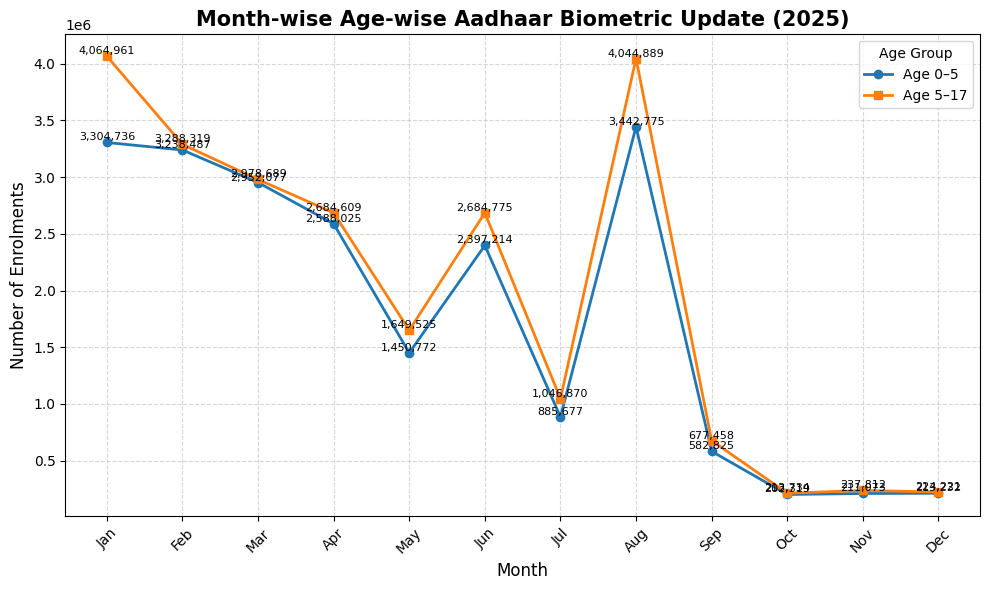

In [8]:
plt.figure(figsize=(10,6))
plt.grid(True, linestyle="--", alpha=0.5)

# Plot lines
plt.plot(monthly_agewise["month_name"], monthly_agewise["bio_age_5_17"],
         marker="o", linewidth=2, label="Age 0–5")
plt.plot(monthly_agewise["month_name"], monthly_agewise["bio_age_17_"],
         marker="s", linewidth=2, label="Age 5–17")

# Add value labels
for i, month in enumerate(monthly_agewise["month_name"]):
    plt.text(i, monthly_agewise["bio_age_5_17"].iloc[i],
             f'{monthly_agewise["bio_age_5_17"].iloc[i]:,}',
             ha='center', va='bottom', fontsize=8)

    plt.text(i, monthly_agewise["bio_age_17_"].iloc[i],
             f'{monthly_agewise["bio_age_17_"].iloc[i]:,}',
             ha='center', va='bottom', fontsize=8)

    

plt.title("Month-wise Age-wise Aadhaar Biometric Update (2025)", fontsize=15, fontweight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Enrolments", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Age Group")
plt.tight_layout()
plt.show()

In [9]:
# State wise aadhar bio_update graph :
bio["date"] = pd.to_datetime(bio["date"])
bio_2025 = bio[bio["date"].dt.year == 2025]
bio_2025["total_biometric_update"] = (
    bio_2025["bio_age_5_17"] +
    bio_2025["bio_age_17_"] 
    
)
state_wise = bio_2025.groupby("state")["total_biometric_update"].sum().reset_index()

state_wise = state_wise.sort_values(
    by="total_biometric_update", ascending=False
).head(10)

C:\Users\ansik\AppData\Local\Temp\ipykernel_14672\2700464789.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bio_2025["total_biometric_update"] = (


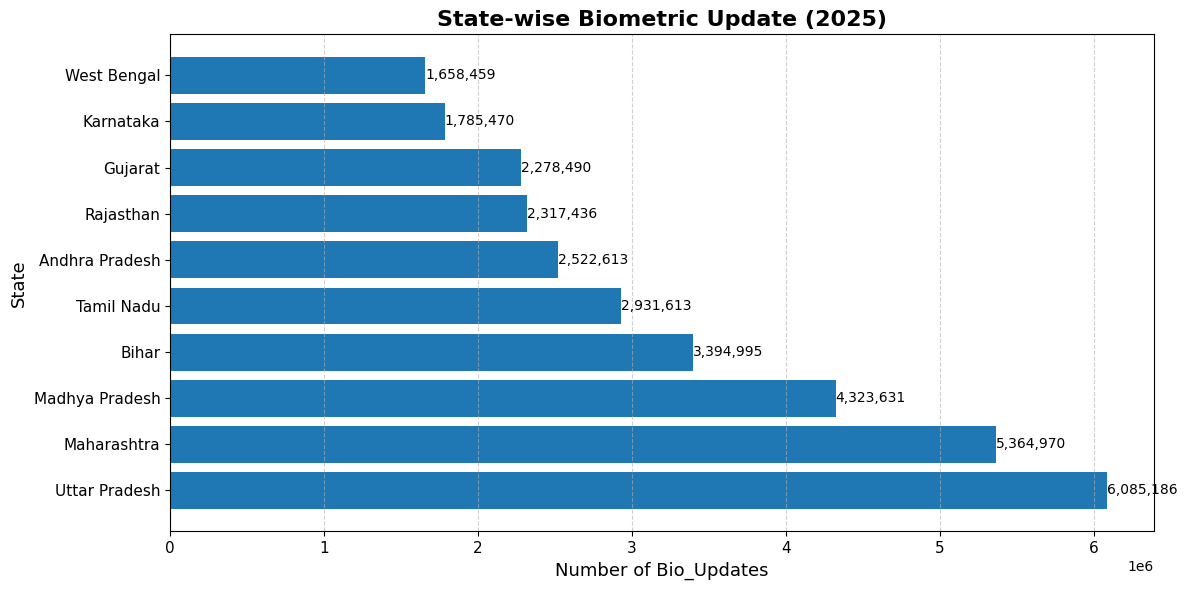

In [10]:
import matplotlib.pyplot as plt

# Sort ascending so largest appears at top after inversion
state_wise_sorted = state_wise.sort_values(by="total_biometric_update")

plt.figure(figsize=(12,6))

bars = plt.barh(
    state_wise_sorted["state"],
    state_wise_sorted["total_biometric_update"]
)

# Value labels
for bar in bars:
    width = bar.get_width()
    plt.text(
        width,
        bar.get_y() + bar.get_height() / 2,
        f"{int(width):,}",
        va="center",
        ha="left",
        fontsize=10
    )

plt.title(
    "State-wise Biometric Update (2025)",
    fontsize=16,
    fontweight="bold"
)
plt.xlabel("Number of Bio_Updates", fontsize=13)
plt.ylabel("State", fontsize=13)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.grid(axis="x", linestyle="--", alpha=0.6)

# 🔑 This line ensures highest is on TOP
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


In [29]:
age_groups = ["bio_age_5_17", "bio_age_17_",]
top_states_dict = {
    "bio_age_5_17": top10_0_5,
    "bio_age_17_": top10_5_17
    
}


=== Pie charts for bio_age_5_17 ===


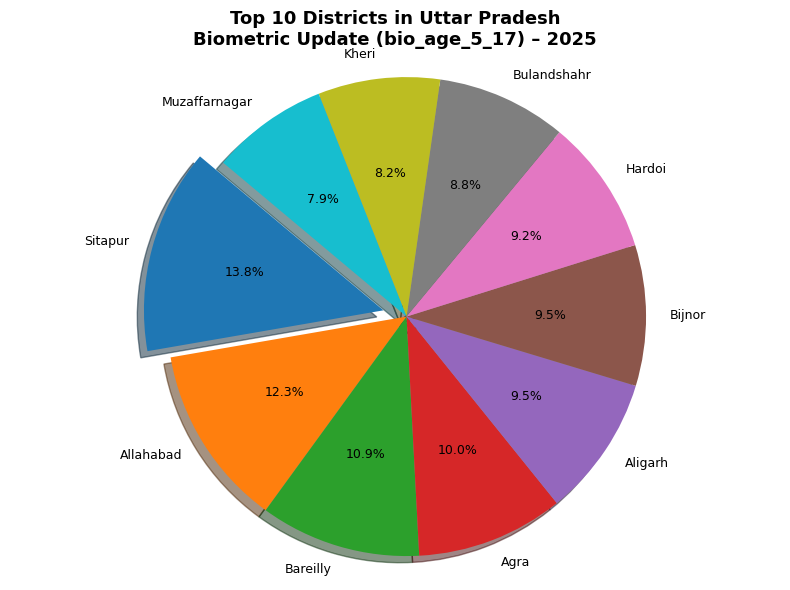

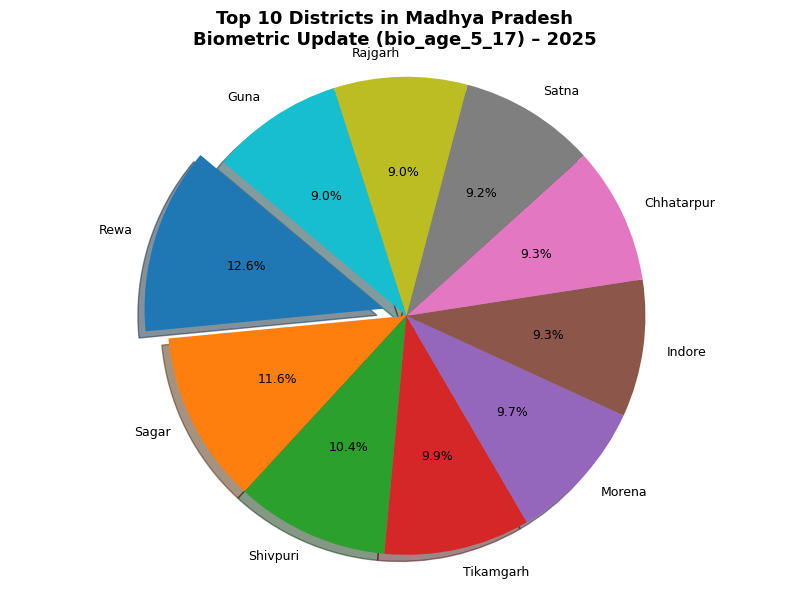

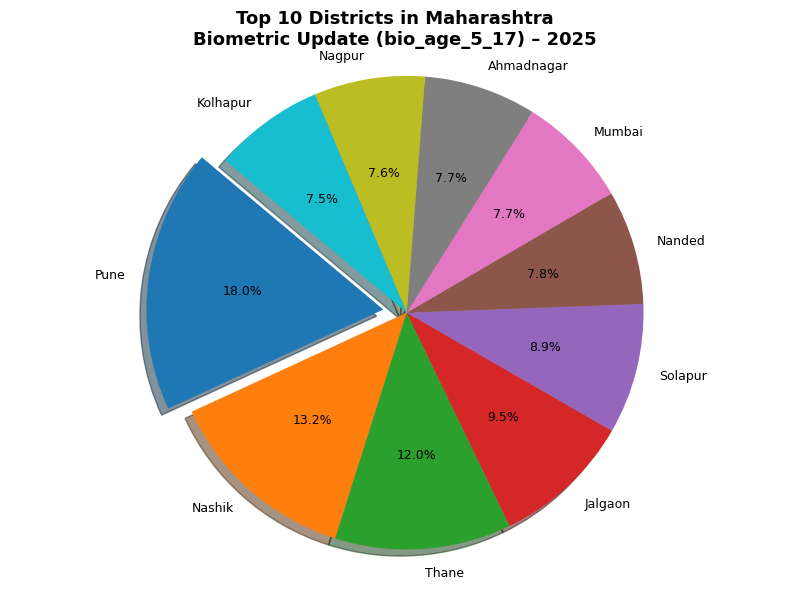

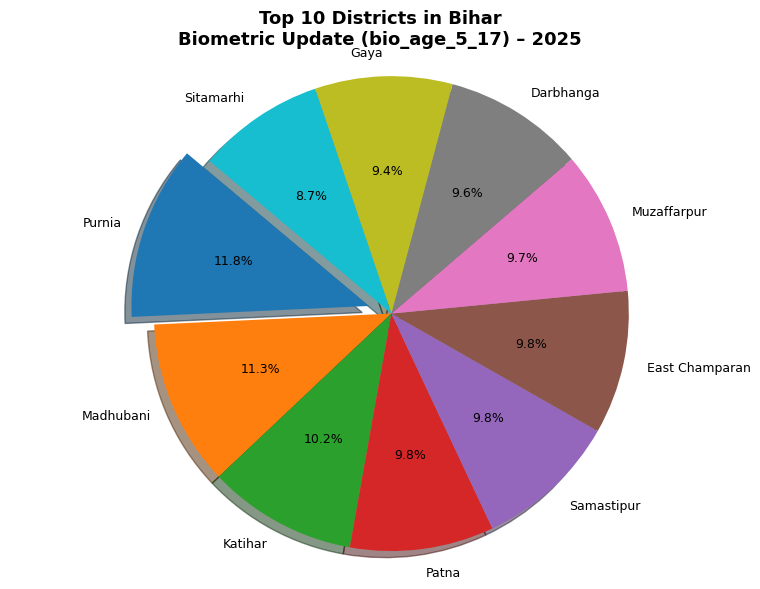

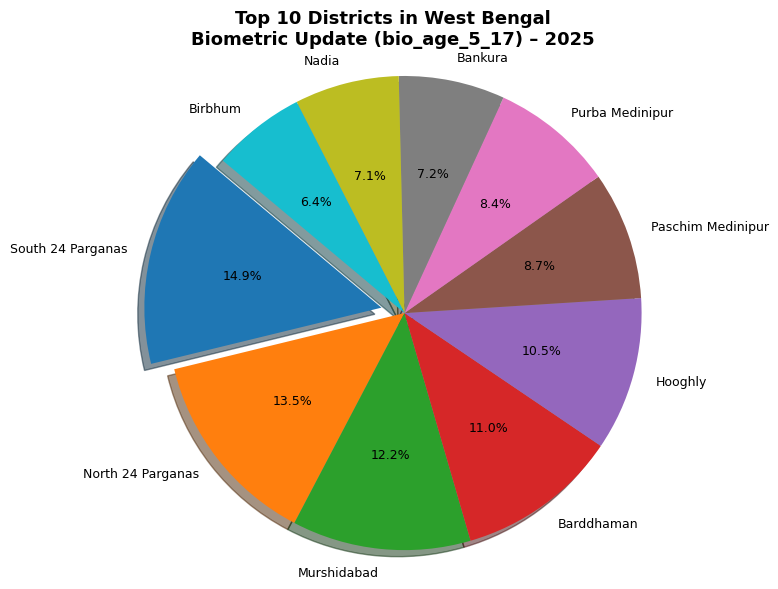

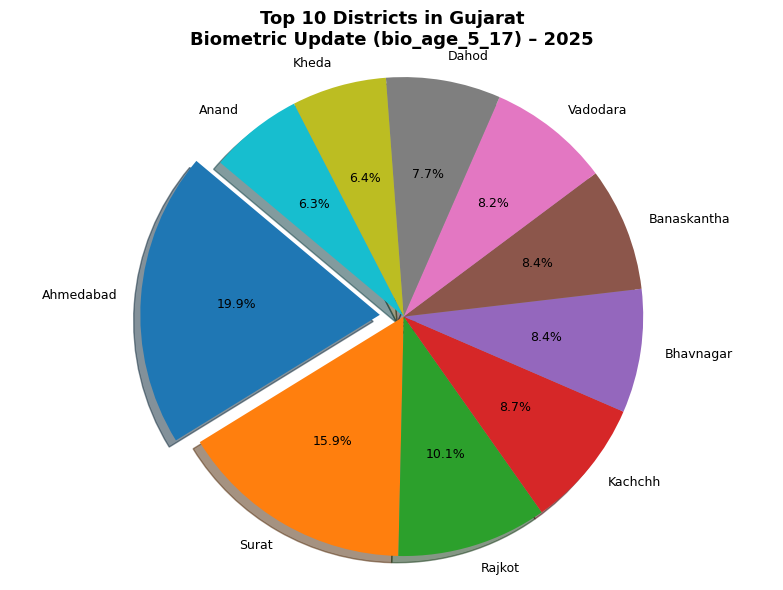

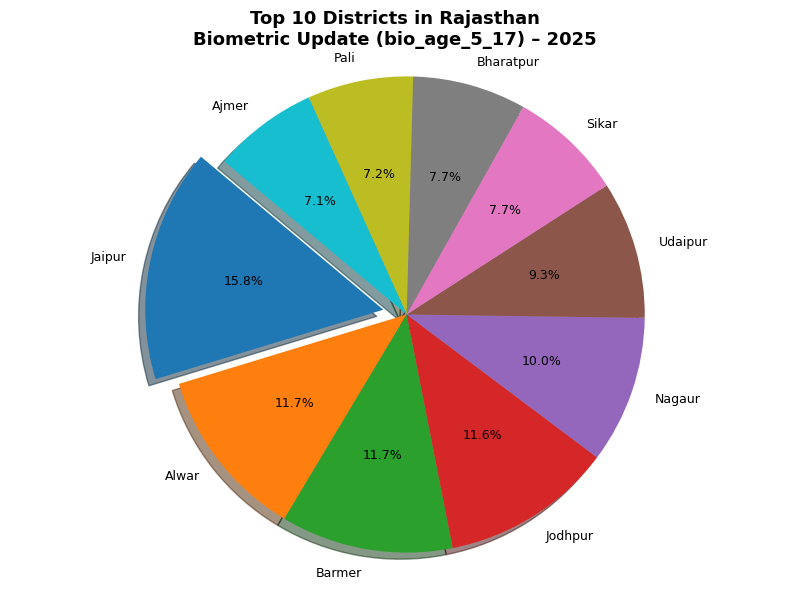

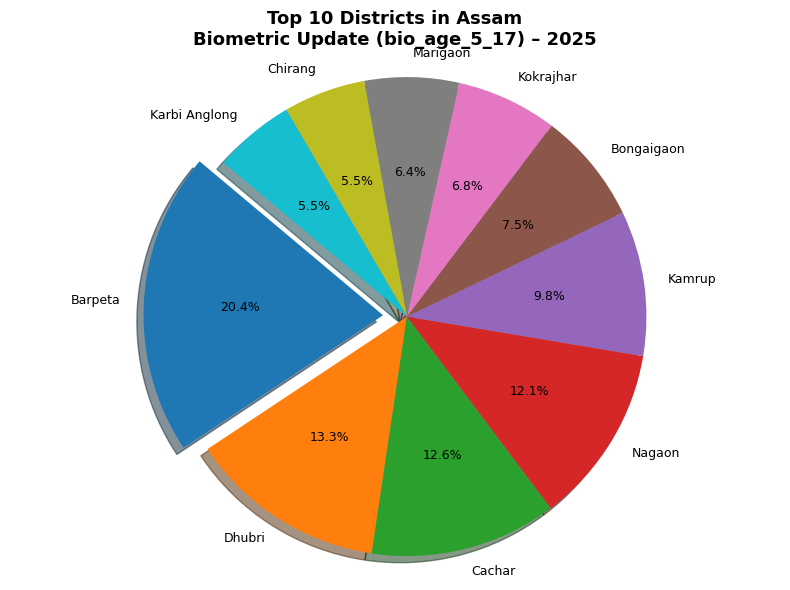

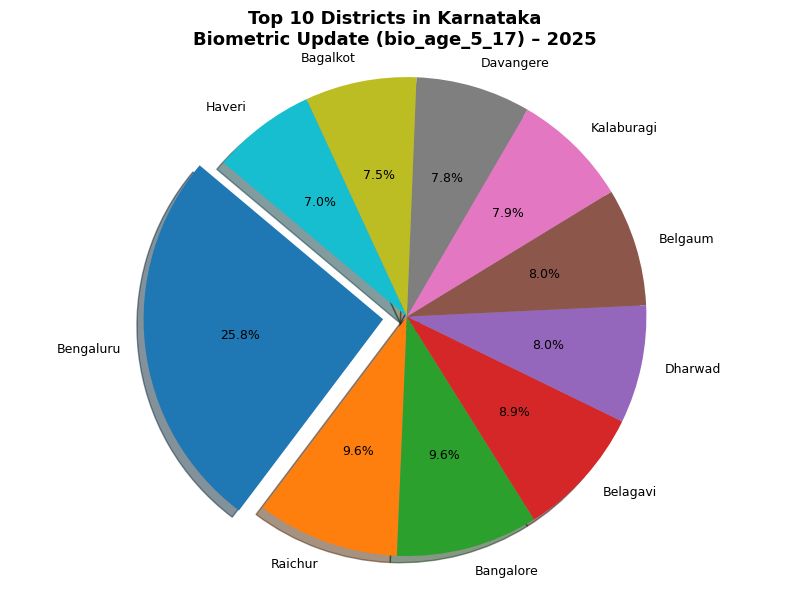

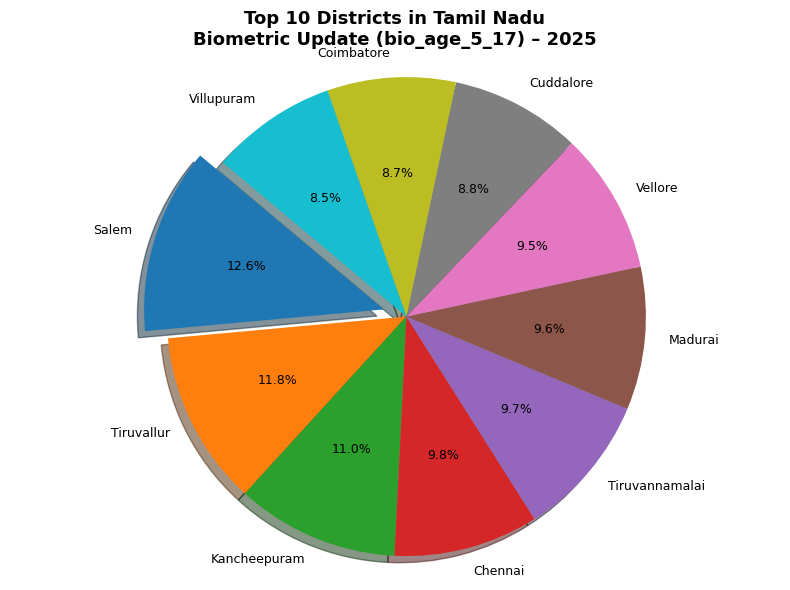


=== Pie charts for bio_age_17_ ===


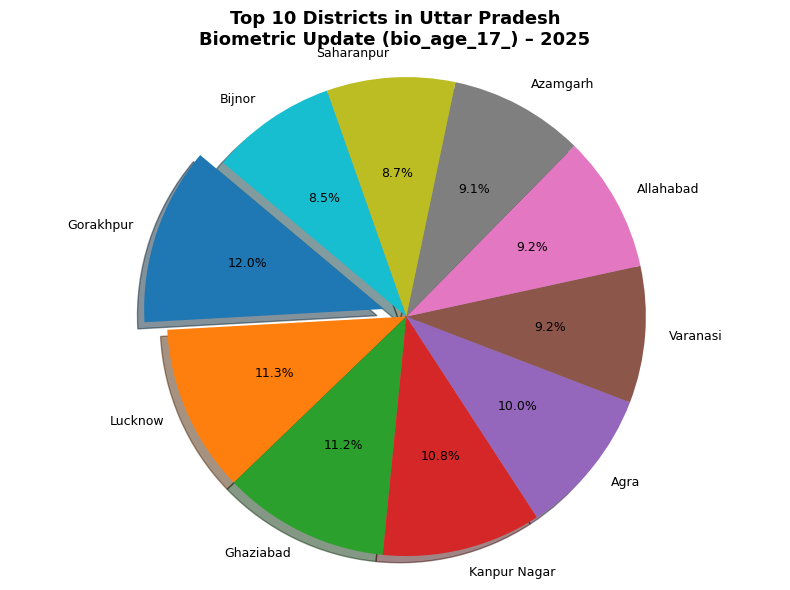

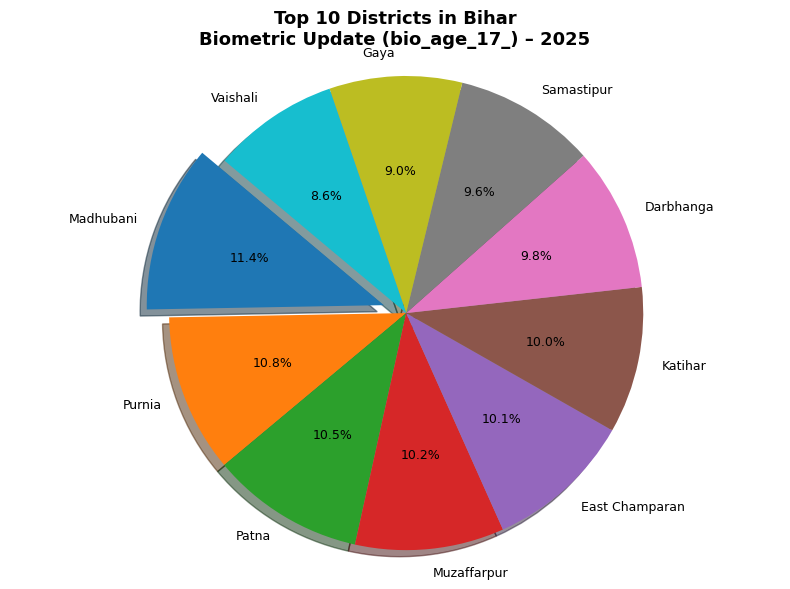

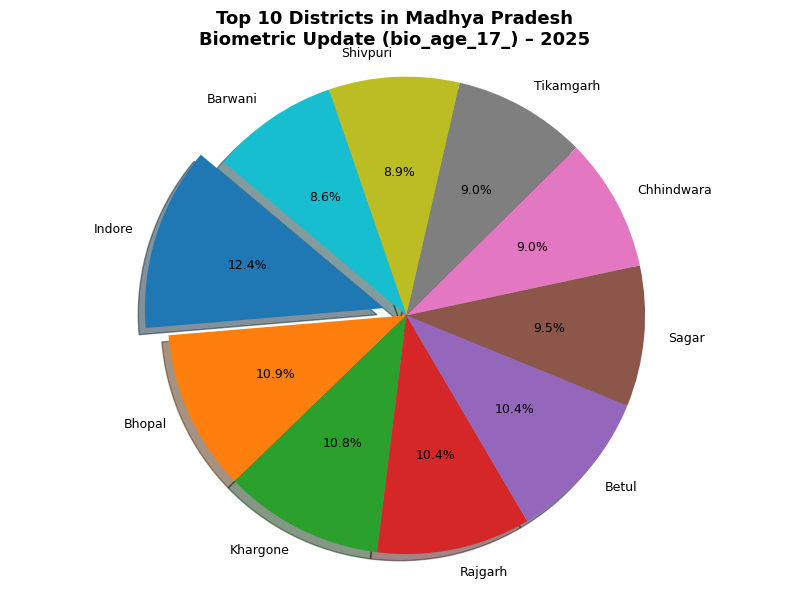

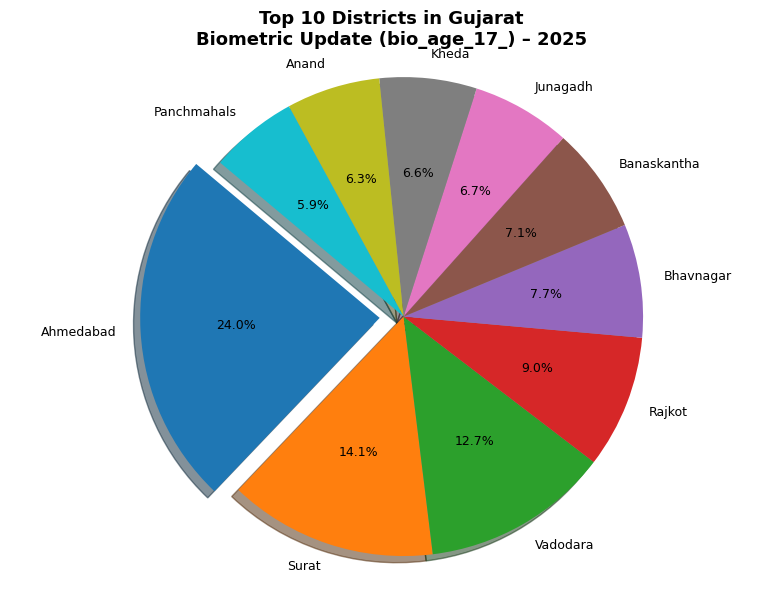

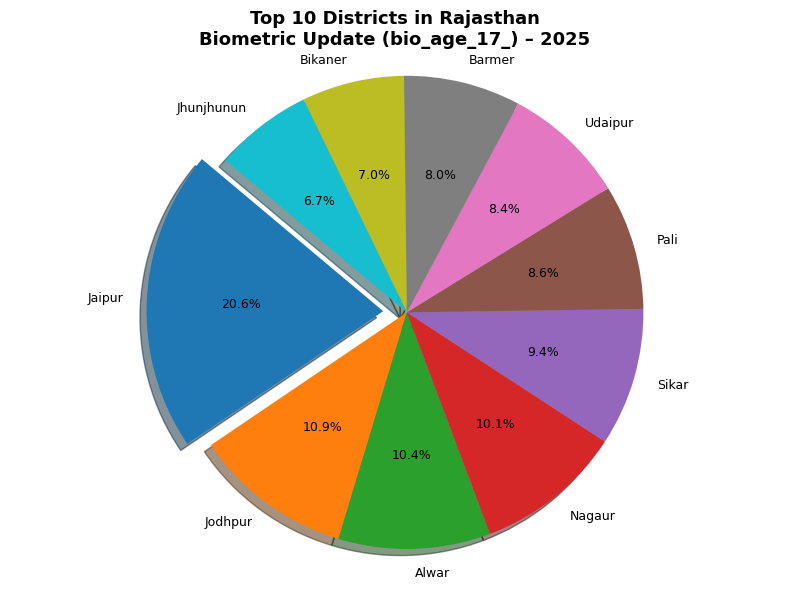

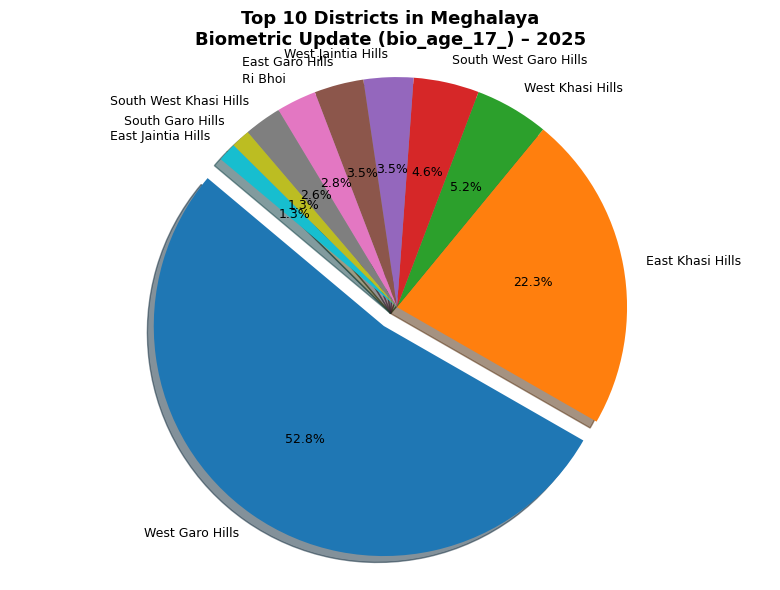

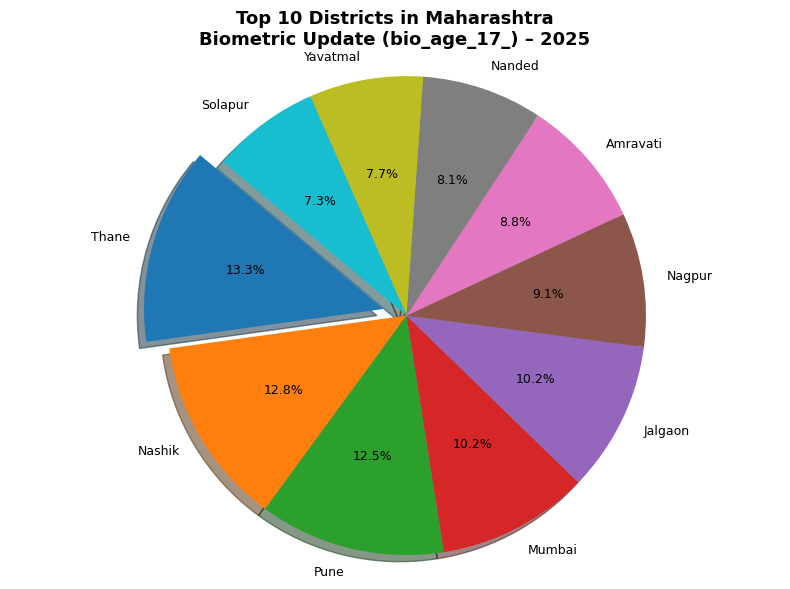

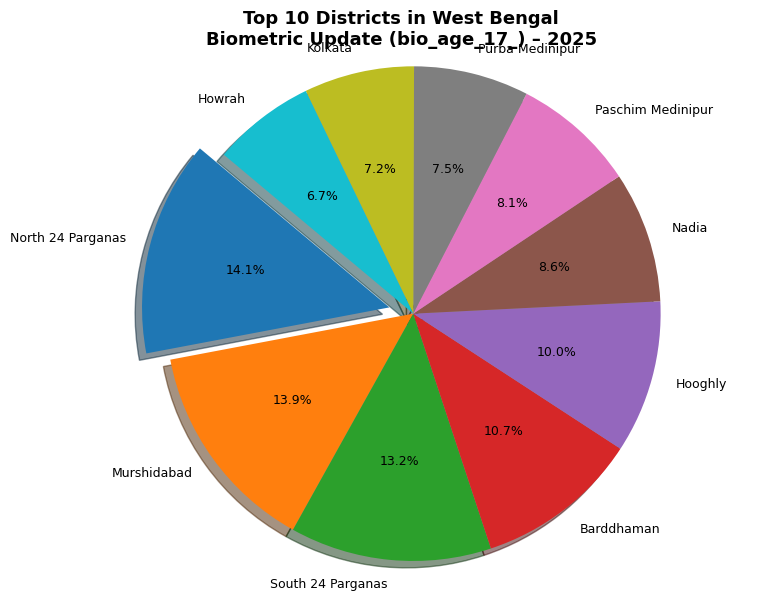

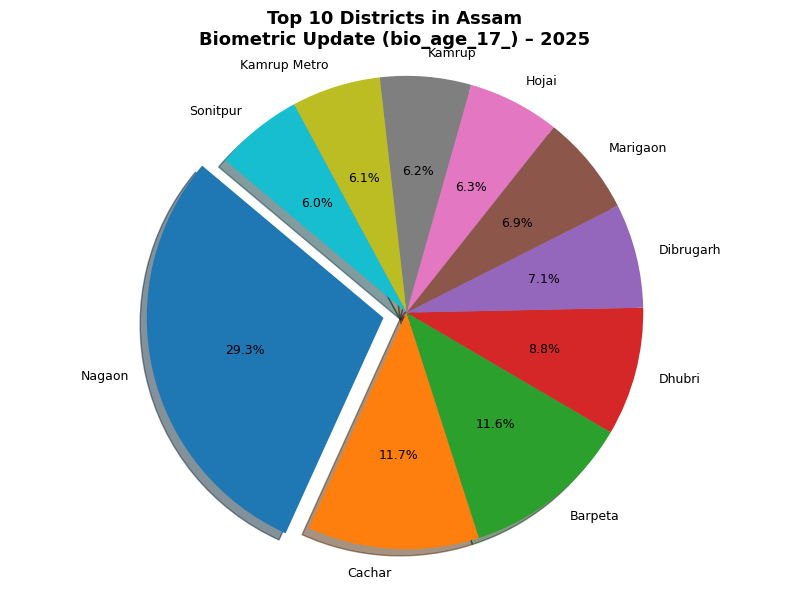

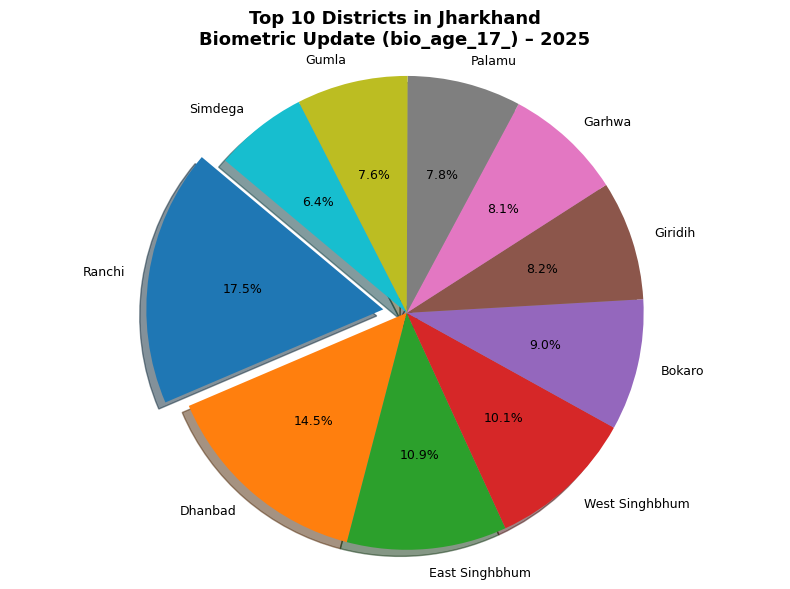

In [30]:


for age in age_groups:
    print(f"\n=== Pie charts for {age} ===")
    
    for state in top_states_dict[age]["state"]:
        state_df = bio_2025[bio_2025["state"] == state]
        
        district_sum = state_df.groupby("district")[age].sum().reset_index()
        top10_districts = district_sum.sort_values(by=age, ascending=False).head(10)

        plt.figure(figsize=(8,6))

        # explode only the largest district
        explode = [0.1] + [0]*(len(top10_districts)-1)

        plt.pie(
            top10_districts[age],
            labels=top10_districts["district"],
            autopct="%1.1f%%",
            startangle=140,
            explode=explode,
            shadow=True,
            textprops={"fontsize": 9}
        )

        plt.title(
            f"Top 10 Districts in {state}\nBiometric Update ({age}) – 2025",
            fontsize=13,
            fontweight="bold"
        )

        plt.axis("equal")
        plt.tight_layout()
        plt.show()